# Data6300 - Data Dive Project – Team 4 (Fall 2023)

**Team Members:**
- Lahm Sayasack
- Nathanael Johnson
- Daniel Park
- Quinton Goodman
- Joshua Kurban

### Import the Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
!pip install seaborn --upgrade
plt.style.use('seaborn')

/var/folders/lf/954gm42n0ggfwzwkw46428280000gn/T/ipykernel_36578/3235954802.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
df_carsales = pd.read_csv('data/CarSales_DataDive.csv', index_col = 0, header= 0)

/var/folders/lf/954gm42n0ggfwzwkw46428280000gn/T/ipykernel_36578/4028005104.py:1: DtypeWarning: Columns (1,2,3,10,11,12,13,14,15,17,18,22,23,26,27,30,31,35,38,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_carsales = pd.read_csv('data/CarSales_DataDive.csv', index_col = 0, header= 0)


In [3]:
df_carsales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215646 entries, 273335 to 119691
Data columns (total 48 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   city                     206239 non-null  object 
 1   bed                      1575 non-null    object 
 2   body_type                205308 non-null  object 
 3   city_fuel_economy        173883 non-null  float64
 4   combine_fuel_economy     0 non-null       float64
 5   daysonmarket             206239 non-null  float64
 6   dealer_zip               206239 non-null  float64
 7   engine_cylinders         199075 non-null  float64
 8   engine_displacement      194191 non-null  float64
 9   engine_type              199075 non-null  object 
 10  exterior_color           202598 non-null  object 
 11  frame_damaged            111298 non-null  object 
 12  franchise_dealer         206239 non-null  object 
 13  franchise_make           152719 non-null  object 
 14  fron

## Hypothesis
***Here are some hypotheses and predictions you can make based on the Car Sales dataset:***
#### ***Vehicle Age vs. Price:***

* Hypothesis: Older cars may have lower prices compared to newer ones.
* Prediction: You can predict that there is a negative correlation between 'year' (vehicle age) and 'price.' Newer cars tend to be more expensive.

#### ***Mileage vs. Price:***

* Hypothesis: Higher mileage in a car typically leads to a lower price since it indicates more wear and tear.
* Prediction: You can predict that there is a negative correlation between 'mileage' and 'price,' meaning that as mileage increases, the price tends to decrease. 

#### ***Fuel Economy vs. Price:***

* Hypothesis: Cars with better fuel economy (higher city and highway fuel economy ratings) may have higher prices due to lower operating costs.
* Prediction: You can predict that there is a positive correlation between 'combine_fuel_economy' with 'price.' Fuel-efficient cars may command higher prices.


## Exploration plots

In [4]:
# we created a function that we will call to replace null values with 0 else return column value
def replacenull(c, colname):
    if pd.isna(c[colname]):
        return 0
    else:
        return c[colname]

In [5]:
columns_to_replace = [
    "is_new", "has_accidents", "salvage", "theft_title", "year", "mileage",
    "daysonmarket", "dealer_zip", "latitude", "listing_id", "longitude",
    "price", "savings_amount", "year", "seller_rating", "engine_cylinders",
    "wheelbase", "height", "length", "width", "maximum_seating",
    "fuel_tank_volume", "mileage", "engine_displacement", "horsepower",
    "city_fuel_economy", "highway_fuel_economy", "torque", "owner_count"
]
for colname in columns_to_replace:
    df_carsales[colname] = df_carsales.apply(replacenull, colname=colname, axis=1)

df_carsales['is_new'] = df_carsales['is_new'].astype(int)

In [6]:
#Explored the data by executing a mutiple regression using statsmodels
X = df_carsales[['is_new','year','mileage','daysonmarket','dealer_zip','latitude','longitude'
                ,'savings_amount','seller_rating','engine_cylinders','wheelbase','height','length','width','maximum_seating'
                ,'fuel_tank_volume','engine_displacement','horsepower','city_fuel_economy','highway_fuel_economy'
                ,'torque','owner_count']]
Y = df_carsales['price']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215646 entries, 273335 to 119691
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   is_new                215646 non-null  int64  
 1   year                  215646 non-null  float64
 2   mileage               215646 non-null  float64
 3   daysonmarket          215646 non-null  float64
 4   dealer_zip            215646 non-null  float64
 5   latitude              215646 non-null  float64
 6   longitude             215646 non-null  float64
 7   savings_amount        215646 non-null  float64
 8   seller_rating         215646 non-null  float64
 9   engine_cylinders      215646 non-null  float64
 10  wheelbase             215646 non-null  float64
 11  height                215646 non-null  float64
 12  length                215646 non-null  float64
 13  width                 215646 non-null  float64
 14  maximum_seating       215646 non-null  float64
 15  

In [7]:
X = sm.add_constant(X) 
reg = sm.OLS(Y, X).fit()
pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 1.273e+04
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:25:18   Log-Likelihood:            -2.3644e+06
No. Observations:              215646   AIC:                         4.729e+06
Df Residuals:                  215623   BIC:                         4.729e+06
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -67.4514    144.156     -0.468      0.640    -349.994     215.091
is_new                1.105e+04     99.039    111.532      0.000    1.09e+04    1.12e+04
year                    10.2760      0.280     36.714      0.000       9.727      10.825
mileage                 -0.0021      0.000    -15.209      0.000      -0.002      -0.002
daysonmarket             1.7478      0.298      5.869      0.000       1.164       2.332
dealer_zip              -0.0060      0.004     -1.646      0.100      -0.013       0.001
latitude               -30.1365      7.063     -4.267      0.000     -43.981     -16.292
longitude              -31.0251      7.083     -4.380      0.000     -44.908     -17.142
savings_amount           2.5154      0.031     81.617      0.000       2.455       2.576
seller_rating         1269.9523     45.434     27.952      0.000    1180.903    1359.001
engine_cylinders       555.3842     28.664     19.376      0.000     499.204     611.564
wheelbase             -113.6557      9.088    -12.507      0.000    -131.467     -95.844
height                 -67.8355      6.914     -9.811      0.000     -81.387     -54.284
length                 -53.1374      5.807     -9.151      0.000     -64.518     -41.756
width                 -165.1243      6.174    -26.744      0.000    -177.226    -153.023
maximum_seating       -512.0432     31.865    -16.069      0.000    -574.497    -449.589
fuel_tank_volume       690.6163     12.561     54.979      0.000     665.996     715.236
engine_displacement     -5.7141      0.059    -97.039      0.000      -5.830      -5.599
horsepower             178.9180      0.766    233.542      0.000     177.416     180.420
city_fuel_economy      508.9830     10.714     47.506      0.000     487.984     529.982
highway_fuel_economy  -484.2565      9.942    -48.707      0.000    -503.743    -464.770
torque                   6.1801      0.345     17.930      0.000       5.505       6.856
owner_count          -3993.1416     42.881    -93.121      0.000   -4077.188   -3909.095
==============================================================================
Omnibus:                   482551.015   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      19702439419.082
Skew:                          20.232   Prob(JB):                         0.00
Kurtosis:                    1483.242   Cond. No.                     1.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
# We create a vif function so we can observe varability 
features = df_carsales[['is_new','year','mileage','daysonmarket','dealer_zip','latitude','longitude'
                ,'savings_amount','seller_rating','engine_cylinders','wheelbase','height','length','width','maximum_seating'
                ,'fuel_tank_volume','engine_displacement','horsepower','city_fuel_economy','highway_fuel_economy'
                ,'torque','owner_count'
                ]]

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
13,130.9,length
11,118.1,wheelbase
7,27.5,longitude
14,24.0,width
0,22.9,const
12,21.9,height
20,20.7,highway_fuel_economy
19,18.5,city_fuel_economy
2,14.7,year
5,9.6,dealer_zip


## New Dataset

In [9]:
#Creating a new dataset with variables we deemed useful from df_carsales
df_Fcarsales = df_carsales[['city','body_type','daysonmarket','price','engine_type','exterior_color','franchise_dealer',
                           'franchise_make','has_accidents','year','seller_rating','is_new','height','listing_color',
                           'length','width','make','maximum_seating','fuel_tank_volume','mileage',
                           'salvage','horsepower','city_fuel_economy','theft_title','highway_fuel_economy',
                           'transmission_display','torque','wheel_system_display','owner_count','combine_fuel_economy']]

## Sorting and Cleaning Outliers

In [10]:
df_Fcarsales["price"].describe()

count    2.156460e+05
mean     2.791223e+04
std      2.119948e+04
min      0.000000e+00
25%      1.614925e+04
50%      2.448800e+04
75%      3.644600e+04
max      1.750000e+06
Name: price, dtype: float64

<Axes: xlabel='price'>

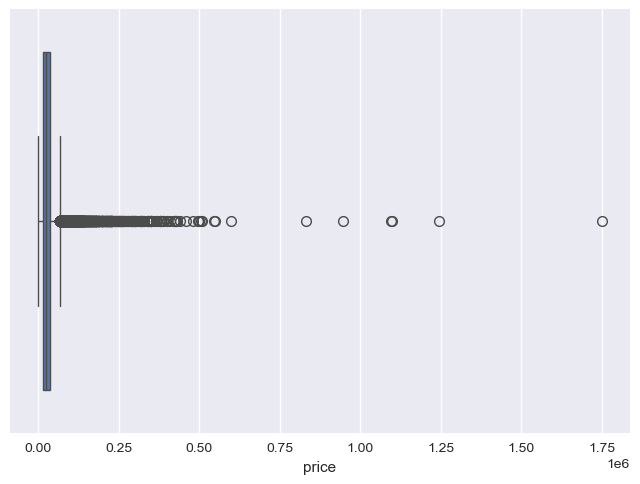

In [11]:
sns.boxplot(x="price", data=df_Fcarsales)
 # checking for outliers

In [12]:
# counting price values and getting rid of some outliers
df_Fcarsales = df_Fcarsales[(df_Fcarsales['price'] > 0) & (df_Fcarsales['price'] < 66675 )]
df_Fcarsales.value_counts(['price']).sort_values(ascending=True)

price  
31634.0      1
55951.0      1
47996.0      1
55960.0      1
55964.0      1
          ... 
11995.0    576
10995.0    597
7995.0     619
8995.0     624
9995.0     705
Name: count, Length: 38582, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

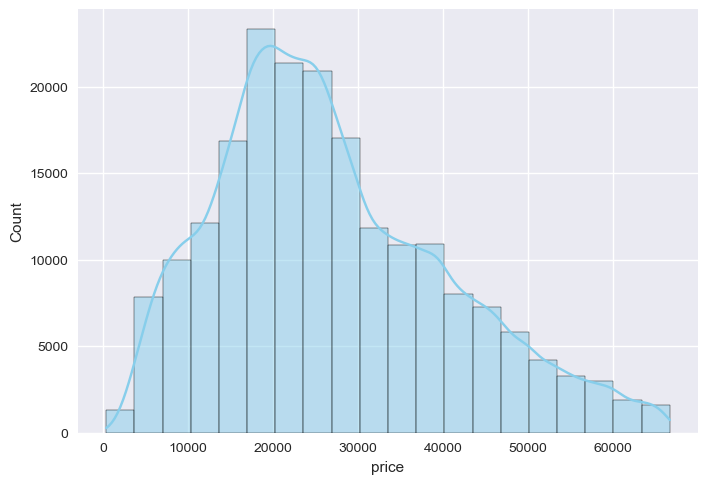

In [13]:
sns.histplot(data=df_Fcarsales, x="price", bins=20, kde=True, color='skyblue', edgecolor='black')

In [14]:
# combining city and highway fuel to make combine_fuel_economy
pd.set_option('display.max_columns', 100)
df_Fcarsales = df_Fcarsales[(df_Fcarsales['city_fuel_economy'] > 0) & (df_Fcarsales['highway_fuel_economy'] > 0)]
df_Fcarsales['combine_fuel_economy'] = df_Fcarsales['city_fuel_economy'] + df_Fcarsales['highway_fuel_economy'] / 2
df_Fcarsales = df_Fcarsales.drop(['city_fuel_economy','highway_fuel_economy'], axis = 1)
df_Fcarsales.head()

,city,body_type,daysonmarket,price,engine_type,exterior_color,franchise_dealer,franchise_make,has_accidents,year,seller_rating,is_new,height,listing_color,length,width,make,maximum_seating,fuel_tank_volume,mileage,salvage,horsepower,theft_title,transmission_display,torque,wheel_system_display,owner_count,combine_fuel_economy
129041,Las Vegas,Sedan,66.0,43960.0,I4,Wave Metallic,True,Cadillac,0,2020.0,4.387097,1,57.2,UNKNOWN,193.8,80.3,Cadillac,5.0,17.4,14.0,0,237.0,0,Automatic,405.0,Rear-Wheel Drive,0.0,39.0
391889,Scottsdale,SUV / Crossover,92.0,27300.0,V6,Shadow Black,True,Mitsubishi,False,2017.0,4.132075,0,70.0,BLACK,198.3,90.2,Ford,7.0,18.6,30260.0,False,290.0,False,6-Speed Automatic,255.0,Front-Wheel Drive,1.0,29.0
190885,Orlando,Sedan,100.0,15198.0,I4,Slate Metallic,False,NaN,False,2018.0,3.471264,0,0.0,UNKNOWN,0.0,0.0,Toyota,0.0,0.0,35843.0,False,0.0,False,Continuously Variable Transmission,0.0,Front-Wheel Drive,1.0,45.5
240480,Cincinnati,Hatchback,9.0,15495.0,I4,Red Hot,True,Chevrolet,0,2021.0,3.764706,1,58.4,RED,143.1,62.8,Chevrolet,4.0,9.0,2.0,0,98.0,0,Continuously Variable Transmission,0.0,Front-Wheel Drive,0.0,49.0
26718,Houston,Pickup Truck,41.0,33720.0,V6,Agate Black Metallic,True,Ford,0,2020.0,4.490566,1,75.6,BLACK,231.9,96.8,Ford,6.0,26.0,12.0,0,375.0,0,Automatic,400.0,4X2,0.0,33.0


### Combinging and Changing Variables

In [15]:
# combined width, length, height to make size and then drop width, length, height
pd.set_option('display.max_columns', 100)
df_Fcarsales['size'] = df_Fcarsales['width'] * df_Fcarsales['length'] * df_Fcarsales['height']
df_Fcarsales = df_Fcarsales.drop(['width','length','height'], axis = 1)
df_Fcarsales.head()

,city,body_type,daysonmarket,price,engine_type,exterior_color,franchise_dealer,franchise_make,has_accidents,year,seller_rating,is_new,listing_color,make,maximum_seating,fuel_tank_volume,mileage,salvage,horsepower,theft_title,transmission_display,torque,wheel_system_display,owner_count,combine_fuel_economy,size
129041,Las Vegas,Sedan,66.0,43960.0,I4,Wave Metallic,True,Cadillac,0,2020.0,4.387097,1,UNKNOWN,Cadillac,5.0,17.4,14.0,0,237.0,0,Automatic,405.0,Rear-Wheel Drive,0.0,39.0,890154.408
391889,Scottsdale,SUV / Crossover,92.0,27300.0,V6,Shadow Black,True,Mitsubishi,False,2017.0,4.132075,0,BLACK,Ford,7.0,18.6,30260.0,False,290.0,False,6-Speed Automatic,255.0,Front-Wheel Drive,1.0,29.0,1252066.200
190885,Orlando,Sedan,100.0,15198.0,I4,Slate Metallic,False,NaN,False,2018.0,3.471264,0,UNKNOWN,Toyota,0.0,0.0,35843.0,False,0.0,False,Continuously Variable Transmission,0.0,Front-Wheel Drive,1.0,45.5,0.000
240480,Cincinnati,Hatchback,9.0,15495.0,I4,Red Hot,True,Chevrolet,0,2021.0,3.764706,1,RED,Chevrolet,4.0,9.0,2.0,0,98.0,0,Continuously Variable Transmission,0.0,Front-Wheel Drive,0.0,49.0,524822.112
26718,Houston,Pickup Truck,41.0,33720.0,V6,Agate Black Metallic,True,Ford,0,2020.0,4.490566,1,BLACK,Ford,6.0,26.0,12.0,0,375.0,0,Automatic,400.0,4X2,0.0,33.0,1697062.752


In [16]:
# we combined make and franchise_make into combined_make and then drop them make and franchise_make
df_Fcarsales['combined_make'] = df_Fcarsales['make'].fillna(df_carsales['franchise_make'])
df_Fcarsales['combined_make']
df_Fcarsales = df_Fcarsales.drop(['franchise_make','make'], axis = 1)
df_Fcarsales.head()

,city,body_type,daysonmarket,price,engine_type,exterior_color,franchise_dealer,has_accidents,year,seller_rating,is_new,listing_color,maximum_seating,fuel_tank_volume,mileage,salvage,horsepower,theft_title,transmission_display,torque,wheel_system_display,owner_count,combine_fuel_economy,size,combined_make
129041,Las Vegas,Sedan,66.0,43960.0,I4,Wave Metallic,True,0,2020.0,4.387097,1,UNKNOWN,5.0,17.4,14.0,0,237.0,0,Automatic,405.0,Rear-Wheel Drive,0.0,39.0,890154.408,Cadillac
391889,Scottsdale,SUV / Crossover,92.0,27300.0,V6,Shadow Black,True,False,2017.0,4.132075,0,BLACK,7.0,18.6,30260.0,False,290.0,False,6-Speed Automatic,255.0,Front-Wheel Drive,1.0,29.0,1252066.200,Ford
190885,Orlando,Sedan,100.0,15198.0,I4,Slate Metallic,False,False,2018.0,3.471264,0,UNKNOWN,0.0,0.0,35843.0,False,0.0,False,Continuously Variable Transmission,0.0,Front-Wheel Drive,1.0,45.5,0.000,Toyota
240480,Cincinnati,Hatchback,9.0,15495.0,I4,Red Hot,True,0,2021.0,3.764706,1,RED,4.0,9.0,2.0,0,98.0,0,Continuously Variable Transmission,0.0,Front-Wheel Drive,0.0,49.0,524822.112,Chevrolet
26718,Houston,Pickup Truck,41.0,33720.0,V6,Agate Black Metallic,True,0,2020.0,4.490566,1,BLACK,6.0,26.0,12.0,0,375.0,0,Automatic,400.0,4X2,0.0,33.0,1697062.752,Ford


In [17]:
# fill na with 0 and then replace 0 with true and false with 1
df_Fcarsales['has_accidents'].fillna(0, inplace=True)
df_Fcarsales['has_accidents'].replace({True: 0, False: 1,}, inplace=True)

In [18]:
df_Fcarsales['franchise_dealer'] = df_Fcarsales['franchise_dealer'].astype(int)

In [19]:
df_Fcarsales['wheel_system_display'] = df_Fcarsales['wheel_system_display'].replace({"All-Wheel Drive":"Four-Wheel Drive", "Front-Wheel Drive":"Two-Wheel Drive", "Rear-Wheel Drive":"Two-Wheel Drive", "4X2":"Two-Wheel Drive"})

In [20]:
# view variables in our updated dataframe
df_Fcarsales['wheel_system_display'].value_counts(dropna = False)

wheel_system_display
Two-Wheel Drive     116252
Four-Wheel Drive     51981
NaN                    985
Name: count, dtype: int64

In [21]:
df_Fcarsales['engine_type'] = df_carsales['engine_type'].replace({"I4" : "Conventional","V6": "Conventional", "V8": "Conventional", "H4": "Conventional", "H4": "Conventional", "I3": "Conventional",
                                                                "I6": "Conventional", "I5": "Conventional", "H6": "Conventional", "V12": "Conventional", "V10": "Conventional",
                                                                "I2": "Conventional", "W12": "Conventional", "R2": "Conventional", "W16": "Conventional", "V8 Flex Fuel Vehicle": "Flex Fuel",
                                                                "V6 Flex Fuel Vehicle": "Flex Fuel", "I4 Flex Fuel Vehicle": "Flex Fuel", "W12 Flex Fuel Vehicle": "Flex Fuel",
                                                                "I4 Hybrid": "Hybrid", "V6 Hybrid": "Hybrid", "V8 Hybrid": "Hybrid", "H4 Hybrid ": "Hybrid", "H4 Hybrid": "Hybrid",
                                                                 "I6 Hybrid": "Hybrid", "I6 Diesel": "Diesel", "V8 Biodiesel": "Diesel",  "I4 Diesel": "Diesel", "V6 Diesel": "Diesel",
                                                                 "V8 Diesel": "Diesel", "V6 Biodiesel": "Diesel", "I5 Diesel": "Diesel", "I5 Biodiesel": "Diesel",
                                                                 "V8 Compressed Natural Gas" : "Compressed Natural Gas", "I4 Compressed Natural Gas": "Compressed Natural Gas",
                                                                 "V6 Compressed Natural Gas": "Compressed Natural Gas"})

### Feature Engineering

In [22]:
# For every value of none for exterior_color we put listing_color and then changed the varaible to e_color and drop'listing_color','exterior_color'
def e_color(c):
    if c['exterior_color'] == 'None':
        return c['listing_color']
    else: 
        return c['exterior_color']

df_Fcarsales['e_color'] = df_Fcarsales.apply(e_color, axis = 1)
df_Fcarsales = df_Fcarsales.drop(['listing_color','exterior_color'], axis = 1)
df_Fcarsales.head()

,city,body_type,daysonmarket,price,engine_type,franchise_dealer,has_accidents,year,seller_rating,is_new,maximum_seating,fuel_tank_volume,mileage,salvage,horsepower,theft_title,transmission_display,torque,wheel_system_display,owner_count,combine_fuel_economy,size,combined_make,e_color
129041,Las Vegas,Sedan,66.0,43960.0,Conventional,1,1,2020.0,4.387097,1,5.0,17.4,14.0,0,237.0,0,Automatic,405.0,Two-Wheel Drive,0.0,39.0,890154.408,Cadillac,Wave Metallic
391889,Scottsdale,SUV / Crossover,92.0,27300.0,Conventional,1,1,2017.0,4.132075,0,7.0,18.6,30260.0,False,290.0,False,6-Speed Automatic,255.0,Two-Wheel Drive,1.0,29.0,1252066.200,Ford,Shadow Black
190885,Orlando,Sedan,100.0,15198.0,Conventional,0,1,2018.0,3.471264,0,0.0,0.0,35843.0,False,0.0,False,Continuously Variable Transmission,0.0,Two-Wheel Drive,1.0,45.5,0.000,Toyota,Slate Metallic
240480,Cincinnati,Hatchback,9.0,15495.0,Conventional,1,1,2021.0,3.764706,1,4.0,9.0,2.0,0,98.0,0,Continuously Variable Transmission,0.0,Two-Wheel Drive,0.0,49.0,524822.112,Chevrolet,Red Hot
26718,Houston,Pickup Truck,41.0,33720.0,Conventional,1,1,2020.0,4.490566,1,6.0,26.0,12.0,0,375.0,0,Automatic,400.0,Two-Wheel Drive,0.0,33.0,1697062.752,Ford,Agate Black Metallic


In [23]:
pd.set_option('display.max_rows', None)
# Group the DataFrame by 'exterior_color' and count the occurrences
color_counts = df_Fcarsales['e_color'].value_counts()
# Sort the counts in descending order
color_counts_sorted = color_counts.sort_values(ascending=False)
# Print the sorted counts
print(color_counts_sorted)

e_color
Black                                                 9729
White                                                 7396
Silver                                                5412
Gray                                                  5244
Summit White                                          4004
Blue                                                  3098
Red                                                   2666
Oxford White                                          2345
Gun Metallic                                          2059
Silver Ice Metallic                                   1911
Platinum White Pearl                                  1870
Bright White Clearcoat                                1772
BLACK                                                 1650
Modern Steel Metallic                                 1551
Crystal Black Pearl                                   1544
Super White                                           1532
Brilliant Silver Metallic                       

In [24]:
def simplify_color(color):
    if isinstance(color, str):
        low_color = color.lower()
        if 'blue' in low_color:
            return 'blue'
        elif 'red' in low_color:
            return 'red'
        elif any(sub_str in low_color for sub_str in ['white', 'whi', 'wht', 'pearl', 'fresh powder']):
            return 'white'
        elif any(sub_str in low_color for sub_str in ['silver', 'gun', 'steel', 'metal', 'magnetic', 'platinum']):
            return 'silver'
        elif any(sub_str in low_color for sub_str in ['gray', 'graphite', 'grey']):
            return 'gray'
        elif any(sub_str in low_color for sub_str in ['black', 'charcoal']):
            return 'black'
        elif 'gold' in low_color:
            return 'gold'
        elif any(sub_str in low_color for sub_str in ['brown', 'tan', 'mocha', 'beige']):
            return 'brown'
        elif any(sub_str in low_color for sub_str in ['green', 'teal']):
            return 'green'
        elif 'orange' in low_color:
            return 'orange'
        elif 'yel' in low_color:
            return 'yellow'
        elif 'maroon' in low_color:
            return 'maroon'
        elif 'purple' in low_color:
            return 'purple'
    return 'other'

In [25]:
# We changed lower cased combined_make into uppercase version for ford and chevrolet
def determine_maker (make):
    if isinstance(make, str):
        if 'ford' in make.lower():
            return 'Ford'
        elif 'chevrolet' in make.lower(): 
            return 'Chevrolet'
    return make.lower()


In [26]:
def determine_trans_type(transmission):
    # Check if transmission is string type
    if isinstance(transmission, str):
        if 'manual' in transmission.lower():
            return 'manual'
        elif 'auto' in transmission.lower() or 'cvt' in transmission.lower() or 'contin' in transmission.lower():
            return 'automatic'
        elif 'dual' in transmission.lower():
            return 'dual'
    # Return empty string for non-string types or other cases
    return 'Unknown'

In [27]:
def update_mileage(row, avg_mileage_per_year):
    if row['is_new'] == 0 and row['mileage'] == 0.0 and row['year'] < 2020:
        return avg_mileage_per_year.get(row['year'], row['mileage'])
    else:
        return row['mileage']

# Calculate average mileage per year
average_mileage_per_year = df_Fcarsales.groupby('year')['mileage'].mean().to_dict()

# Apply the function to the 'mileage' column
df_Fcarsales['mileage'] = df_Fcarsales.apply(lambda row: update_mileage(row, average_mileage_per_year), axis=1)

### One-Hot Encode

In [28]:
# Importing sklearned
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [29]:
#change thefth_title to quantitaive values
df_Fcarsales['salvage'] = lc.fit_transform(df_Fcarsales['salvage'])
df_Fcarsales['salvage'].value_counts(dropna=False)

salvage
0    168077
1      1141
Name: count, dtype: int64

In [30]:
#change thefth_title to quantitaive values
df_Fcarsales['theft_title'] = lc.fit_transform(df_Fcarsales['theft_title'])
df_Fcarsales['theft_title'].value_counts(dropna=False)

theft_title
0    168786
1       432
Name: count, dtype: int64

### Creating Dummies

In [31]:
# Creating dummies for body type, concatenating it to df_Fcarsales, and dropping body_type
dummies_bt = pd.get_dummies(df_Fcarsales['body_type'], prefix='bt', drop_first=False, dtype='int')

# Identifying the column with the highest frequency
highest_freq_column = dummies_bt.sum().idxmax()

# Dropping the column with the highest frequency
dummies_bt = dummies_bt.drop(highest_freq_column, axis=1)


df_Fcarsales = pd.concat([df_Fcarsales, dummies_bt], axis=1)

df_Fcarsales = df_Fcarsales.drop(['body_type'], axis=1)

In [32]:
# Creating dummies for engine_type, concating it to df_Fcarsales, dropping engine_type
dummies_et= pd.get_dummies(df_Fcarsales['engine_type'], prefix = 'et', drop_first= False, dtype='int')

# Identify the column with the highest frequency
highest_freq_column = dummies_et.sum().idxmax()

# Drop the column with the highest frequency
dummies_et = dummies_et.drop(highest_freq_column, axis=1)

df_Fcarsales = pd.concat([df_Fcarsales, dummies_et], axis = 1)
df_Fcarsales = df_Fcarsales.drop(['engine_type'], axis = 1)

In [33]:
# Creating dummies for city, concating it to df_Fcarsales, dropping city
dummies_ct= pd.get_dummies(df_Fcarsales['city'], prefix = 'ct', drop_first= False, dtype='int')

# Identify the column with the highest frequency
highest_freq_column = dummies_ct.sum().idxmax()

# Drop the column with the highest frequency
dummies_ct = dummies_ct.drop(highest_freq_column, axis=1)

df_Fcarsales = pd.concat([df_Fcarsales, dummies_ct], axis = 1)
df_Fcarsales = df_Fcarsales.drop(['city'], axis = 1)

In [34]:
# Creating dummies for wheel_system_display, concating it to df_Fcarsales, dropping wheel_system_display
dummies_wd= pd.get_dummies(df_Fcarsales['wheel_system_display'], prefix = 'wd', drop_first= False, dtype='int')

df_Fcarsales = pd.concat([df_Fcarsales, dummies_wd], axis = 1)
df_Fcarsales = df_Fcarsales.drop(['wheel_system_display'], axis = 1)

In [35]:
# Create a new column 'trans_type' by applying the custom function to the 'transmission_display' column, drop transmission_display
df_Fcarsales['trans_type'] = df_Fcarsales['transmission_display'].apply(determine_trans_type)
dummies_tt= pd.get_dummies(df_Fcarsales['trans_type'], prefix = 'tt', drop_first= False, dtype='int')

# Identify the column with the highest frequency
highest_freq_column = dummies_tt.sum().idxmax()

# Drop the column with the highest frequency
dummies_tt = dummies_tt.drop(highest_freq_column, axis=1)

df_Fcarsales = pd.concat([df_Fcarsales, dummies_tt], axis = 1)
df_Fcarsales = df_Fcarsales.drop(['trans_type'], axis = 1)
df_Fcarsales = df_Fcarsales.drop(['transmission_display'], axis = 1)

In [36]:
# Create a new column 'simple_color' by applying the custom function to the 'e_color' column, drop e_color
df_Fcarsales['simple_color'] = df_Fcarsales['e_color'].apply(simplify_color)
dummies_sc= pd.get_dummies(df_Fcarsales['simple_color'], prefix = 'sc', drop_first= False, dtype='int')

# Identify the column with the highest frequency
highest_freq_column = dummies_sc.sum().idxmax()

# Drop the column with the highest frequency
dummies_ec = dummies_sc.drop(highest_freq_column, axis=1)


df_Fcarsales = pd.concat([df_Fcarsales, dummies_sc], axis = 1)
df_Fcarsales = df_Fcarsales.drop(['e_color'], axis = 1)
df_Fcarsales = df_Fcarsales.drop(['simple_color'], axis = 1)

In [37]:
# Create a new column 'Maker' by applying the custom function to the 'combined_make' column, drop combined_make
df_Fcarsales['Maker'] = df_Fcarsales['combined_make'].apply(determine_maker)
dummies_cm = pd.get_dummies(df_Fcarsales['Maker'], prefix = 'cm', drop_first= False, dtype='int')

#Identify the column with the highest frequency
highest_freq_column = dummies_cm.sum().idxmax()

# Drop the column with the highest frequency
dummies_cm = dummies_cm.drop(highest_freq_column, axis=1)

df_Fcarsales = pd.concat([df_Fcarsales, dummies_cm], axis = 1)
df_Fcarsales = df_Fcarsales.drop(['combined_make'], axis = 1)
df_Fcarsales = df_Fcarsales.drop(['Maker'], axis = 1)

In [38]:
df_Fcarsales.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Index: 169218 entries, 129041 to 52208
Data columns (total 126 columns):
 #    Column                     Non-Null Count   Dtype  
---   ------                     --------------   -----  
 0    daysonmarket               169218 non-null  float64
 1    price                      169218 non-null  float64
 2    franchise_dealer           169218 non-null  int64  
 3    has_accidents              169218 non-null  int64  
 4    year                       169218 non-null  float64
 5    seller_rating              169218 non-null  float64
 6    is_new                     169218 non-null  int64  
 7    maximum_seating            169218 non-null  float64
 8    fuel_tank_volume           169218 non-null  float64
 9    mileage                    169218 non-null  float64
 10   salvage                    169218 non-null  int64  
 11   horsepower                 169218 non-null  float64
 12   theft_title                169218 non-null  int64  
 13   torque       

### Model 1

In [39]:
# view variables in our updated dataframe
df_Fcarsales.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
Index: 169218 entries, 129041 to 52208
Data columns (total 126 columns):
 #    Column                     Non-Null Count   Dtype  
---   ------                     --------------   -----  
 0    daysonmarket               169218 non-null  float64
 1    price                      169218 non-null  float64
 2    franchise_dealer           169218 non-null  int64  
 3    has_accidents              169218 non-null  int64  
 4    year                       169218 non-null  float64
 5    seller_rating              169218 non-null  float64
 6    is_new                     169218 non-null  int64  
 7    maximum_seating            169218 non-null  float64
 8    fuel_tank_volume           169218 non-null  float64
 9    mileage                    169218 non-null  float64
 10   salvage                    169218 non-null  int64  
 11   horsepower                 169218 non-null  float64
 12   theft_title                169218 non-null  int64  
 13   torque       

In [40]:
# Brief look at the values for each variable 
df_Fcarsales.head()

,daysonmarket,price,franchise_dealer,has_accidents,year,seller_rating,is_new,maximum_seating,fuel_tank_volume,mileage,salvage,horsepower,theft_title,torque,owner_count,combine_fuel_economy,size,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,et_Compressed Natural Gas,et_Diesel,et_Flex Fuel,et_Hybrid,ct_Albuquerque,ct_Arlington,ct_Austin,ct_Charlotte,ct_Chicago,ct_Cincinnati,ct_Columbia,ct_Columbus,ct_Dallas,ct_Denver,ct_El Paso,ct_Indianapolis,ct_Jacksonville,ct_Las Vegas,ct_Louisville,ct_Madison,ct_Miami,ct_Oklahoma City,ct_Orlando,ct_Phoenix,ct_Raleigh,...,sc_yellow,cm_Chevrolet,cm_acura,cm_alfa romeo,cm_aston martin,cm_audi,cm_bentley,cm_bmw,cm_buick,cm_cadillac,cm_chrysler,cm_dodge,cm_fiat,cm_fisker,cm_genesis,cm_gmc,cm_honda,cm_hummer,cm_hyundai,cm_infiniti,cm_isuzu,cm_jaguar,cm_jeep,cm_kia,cm_land rover,cm_lexus,cm_lincoln,cm_lotus,cm_maserati,cm_mazda,cm_mercedes-benz,cm_mercury,cm_mini,cm_mitsubishi,cm_nissan,cm_oldsmobile,cm_plymouth,cm_pontiac,cm_porsche,cm_ram,cm_saab,cm_saturn,cm_scion,cm_smart,cm_subaru,cm_suzuki,cm_tesla,cm_toyota,cm_volkswagen,cm_volvo
129041,66.0,43960.0,1,1,2020.0,4.387097,1,5.0,17.4,14.0,0,237.0,0,405.0,0.0,39.0,890154.408,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
391889,92.0,27300.0,1,1,2017.0,4.132075,0,7.0,18.6,30260.0,0,290.0,0,255.0,1.0,29.0,1252066.200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
190885,100.0,15198.0,0,1,2018.0,3.471264,0,0.0,0.0,35843.0,0,0.0,0,0.0,1.0,45.5,0.000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
240480,9.0,15495.0,1,1,2021.0,3.764706,1,4.0,9.0,2.0,0,98.0,0,0.0,0.0,49.0,524822.112,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26718,41.0,33720.0,1,1,2020.0,4.490566,1,6.0,26.0,12.0,0,375.0,0,400.0,0.0,33.0,1697062.752,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# print out each column in the data frame 
print(df_Fcarsales.columns.tolist())
#This will list out all of the columns in the x 

['daysonmarket', 'price', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'fuel_tank_volume', 'mileage', 'salvage', 'horsepower', 'theft_title', 'torque', 'owner_count', 'combine_fuel_economy', 'size', 'bt_Convertible', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Columbia', 'ct_Columbus', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Las Vegas', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'wd_Four-Wheel Drive', 'wd_Two-Wheel Drive', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_black', 'sc_blue', 'sc_brown', 'sc_gol

In [42]:
#execute a mutiple regression using statsmodels for model 1
X  = df_Fcarsales[['daysonmarket', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'fuel_tank_volume', 'mileage', 'salvage', 'horsepower', 'theft_title', 'torque', 'owner_count', 'combine_fuel_economy', 'size', 'bt_Convertible', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Columbia', 'ct_Columbus', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Las Vegas', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'wd_Four-Wheel Drive', 'wd_Two-Wheel Drive', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_black', 'sc_blue', 'sc_brown', 'sc_gold', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_purple', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin', 'cm_audi', 'cm_bentley', 'cm_bmw', 'cm_buick', 'cm_cadillac', 'cm_chrysler', 'cm_dodge', 'cm_fiat', 'cm_fisker', 'cm_genesis', 'cm_gmc', 'cm_honda', 'cm_hummer', 'cm_hyundai', 'cm_infiniti', 'cm_isuzu', 'cm_jaguar', 'cm_jeep', 'cm_kia', 'cm_land rover', 'cm_lexus', 'cm_lincoln', 'cm_lotus', 'cm_maserati', 'cm_mazda', 'cm_mercedes-benz', 'cm_mercury', 'cm_mini', 'cm_mitsubishi', 'cm_nissan', 'cm_oldsmobile', 'cm_plymouth', 'cm_pontiac', 'cm_porsche', 'cm_ram', 'cm_saab', 'cm_saturn', 'cm_scion', 'cm_smart', 'cm_subaru', 'cm_suzuki', 'cm_tesla', 'cm_toyota', 'cm_volkswagen', 'cm_volvo']]
Y = df_Fcarsales['price']

X = sm.add_constant(X) 
reg = sm.OLS(Y, X).fit()
pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     5724.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:25:28   Log-Likelihood:            -1.7061e+06
No. Observations:              169218   AIC:                         3.413e+06
Df Residuals:                  169093   BIC:                         3.414e+06
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.261e+06   1.67e+04    -75.601      0.000   -1.29e+06   -1.23e+06
daysonmarket                  0.9118      0.142      6.436      0.000       0.634       1.189
franchise_dealer           1436.7873     43.211     33.251      0.000    1352.095    1521.480
has_accidents               555.4394     53.857     10.313      0.000     449.880     660.998
year                        672.8336      8.857     75.965      0.000     655.474     690.193
seller_rating               425.9614     21.623     19.699      0.000     383.581     468.342
is_new                     4043.0114     45.337     89.177      0.000    3954.152    4131.871
maximum_seating            -164.6696     20.931     -7.867      0.000    -205.695    -123.644
fuel_tank_volume            280.3884      8.318     33.707      0.000     264.085     296.692
mileage                      -0.0816      0.001   -115.055      0.000      -0.083      -0.080
salvage                   -1551.6836    177.692     -8.732      0.000   -1899.955   -1203.412
horsepower                   67.8572      0.381    178.229      0.000      67.111      68.603
theft_title                  61.2097    280.253      0.218      0.827    -488.080     610.499
torque                        2.7516      0.208     13.198      0.000       2.343       3.160
owner_count                -482.2841     25.241    -19.107      0.000    -531.756    -432.812
combine_fuel_economy        122.6139      1.993     61.519      0.000     118.707     126.520
size                          0.0038      0.000     17.706      0.000       0.003       0.004
bt_Convertible             2131.1060    164.373     12.965      0.000    1808.939    2453.273
bt_Coupe                  -1003.9231    108.918     -9.217      0.000   -1217.399    -790.447
bt_Hatchback               -539.7540     94.650     -5.703      0.000    -725.267    -354.241
bt_Minivan                 -134.1029    102.828     -1.304      0.192    -335.643      67.437
bt_Pickup Truck            -594.7299     90.931     -6.540      0.000    -772.953    -416.507
bt_Sedan                  -2245.9256     42.538    -52.798      0.000   -2329.300   -2162.551
bt_Van                     -265.7335    189.370     -1.403      0.161    -636.895     105.428
bt_Wagon                   1111.1903    128.309      8.660      0.000     859.707    1362.674
et_Compressed Natural Gas  7397.5559   3344.662      2.212      0.027     842.092     1.4e+04
et_Diesel                  5954.4686    187.226     31.804      0.000    5587.510    6321.427
et_Flex Fuel              -3282.4007     78.753    -41.680      0.000   -3436.754   -3128.047
et_Hybrid                   122.6337    104.260      1.176      0.240     -81.713     326.980
ct_Albuquerque              126.3951    101.834      1.241      0.215     -

In [43]:
# We made a Correlation Matrix for model 1
features = df_Fcarsales[['daysonmarket', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'fuel_tank_volume', 'mileage', 'salvage', 'horsepower', 'theft_title', 'torque', 'owner_count', 'combine_fuel_economy', 'size', 'bt_Convertible', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Columbia', 'ct_Columbus', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Las Vegas', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'wd_Four-Wheel Drive', 'wd_Two-Wheel Drive', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_black', 'sc_blue', 'sc_brown', 'sc_gold', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_purple', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin', 'cm_audi', 'cm_bentley', 'cm_bmw', 'cm_buick', 'cm_cadillac', 'cm_chrysler', 'cm_dodge', 'cm_fiat', 'cm_fisker', 'cm_genesis', 'cm_gmc', 'cm_honda', 'cm_hummer', 'cm_hyundai', 'cm_infiniti', 'cm_isuzu', 'cm_jaguar', 'cm_jeep', 'cm_kia', 'cm_land rover', 'cm_lexus', 'cm_lincoln', 'cm_lotus', 'cm_maserati', 'cm_mazda', 'cm_mercedes-benz', 'cm_mercury', 'cm_mini', 'cm_mitsubishi', 'cm_nissan', 'cm_oldsmobile', 'cm_plymouth', 'cm_pontiac', 'cm_porsche', 'cm_ram', 'cm_saab', 'cm_saturn', 'cm_scion', 'cm_smart', 'cm_subaru', 'cm_suzuki', 'cm_tesla', 'cm_toyota', 'cm_volkswagen', 'cm_volvo']]
#shows all columns and rows
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
corrMatrix = features.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
df_corrMatrix

,daysonmarket,franchise_dealer,has_accidents,year,seller_rating,is_new,maximum_seating,fuel_tank_volume,mileage,salvage,horsepower,theft_title,torque,owner_count,combine_fuel_economy,size,bt_Convertible,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,et_Compressed Natural Gas,et_Diesel,et_Flex Fuel,et_Hybrid,ct_Albuquerque,ct_Arlington,ct_Austin,ct_Charlotte,ct_Chicago,ct_Cincinnati,ct_Columbia,ct_Columbus,ct_Dallas,ct_Denver,ct_El Paso,ct_Indianapolis,ct_Jacksonville,ct_Las Vegas,ct_Louisville,ct_Madison,ct_Miami,ct_Oklahoma City,ct_Orlando,ct_Phoenix,ct_Raleigh,ct_Richmond,ct_San Antonio,ct_San Jose,ct_Scottsdale,ct_Springfield,ct_Stafford,ct_Tampa,ct_Tucson,wd_Four-Wheel Drive,wd_Two-Wheel Drive,tt_Unknown,tt_dual,tt_manual,sc_black,sc_blue,sc_brown,sc_gold,sc_gray,sc_green,sc_maroon,sc_orange,sc_other,sc_purple,sc_red,sc_silver,sc_white,sc_yellow,cm_Chevrolet,cm_acura,cm_alfa romeo,cm_aston martin,cm_audi,cm_bentley,cm_bmw,cm_buick,cm_cadillac,cm_chrysler,cm_dodge,cm_fiat,cm_fisker,cm_genesis,cm_gmc,cm_honda,cm_hummer,cm_hyundai,cm_infiniti,cm_isuzu,cm_jaguar,cm_jeep,cm_kia,cm_land rover,cm_lexus,cm_lincoln,cm_lotus,cm_maserati,cm_mazda,cm_mercedes-benz,cm_mercury,cm_mini,cm_mitsubishi,cm_nissan,cm_oldsmobile,cm_plymouth,cm_pontiac,cm_porsche,cm_ram,cm_saab,cm_saturn,cm_scion,cm_smart,cm_subaru,cm_suzuki,cm_tesla,cm_toyota,cm_volkswagen,cm_volvo
daysonmarket,1.000000,0.012554,-0.008252,-0.007708,-0.014692,0.175136,-0.016544,-0.026540,-0.044418,0.053502,-0.039468,0.013779,-0.025437,-0.053970,2.997319e-03,-0.011022,0.001130,-0.023886,0.012932,0.005554,-0.025049,-0.013339,0.052696,0.004689,0.000410,0.005108,0.001649,-0.007230,0.003205,0.005532,-6.843193e-03,-0.017739,0.013833,-0.006819,0.005303,-0.014511,-0.008881,-4.421862e-03,0.055496,-0.007928,0.010055,-0.002427,0.015329,-0.002978,0.020228,0.025443,-0.013609,-0.019500,-0.017087,0.017115,0.009376,-0.007598,-0.013172,0.009091,-0.042091,-0.020231,-0.001333,-0.014498,0.013588,-0.027559,1.548134e-02,-0.008330,0.000477,-0.010810,0.011881,0.014409,-0.015596,-0.003291,0.005040,-0.002946,-0.005528,-0.006356,0.006376,0.006215,0.003412,0.000180,-0.027321,0.016580,0.006673,-0.001096,-0.017120,0.002306,0.023859,0.021075,0.011320,0.007019,-0.012904,0.014049,-0.002635,-0.000399,-0.023951,-0.026160,0.001502,0.016901,0.003212,-0.002025,0.043294,0.014429,-0.011732,0.029016,-0.023561,0.018933,0.006641,0.007619,-0.002692,-0.001631,0.001714,0.016283,0.040413,0.010804,-0.001038,0.000504,0.008005,0.003728,-0.001143,-0.001149,0.003255,0.005058,-0.001874,-0.035597,0.003681,-0.009207,-0.064698,0.003387,0.037133
franchise_dealer,0.012554,1.000000,0.271135,0.529374,-0.014621,0.546060,0.033908,-0.039319,-0.546177,-0.132980,0.003571,-0.054704,-0.043079,-0.546083,6.699042e-02,0.089130,-0.055464,-0.049714,-0.034984,-0.026201,0.066500,-0.084039,-0.022911,-0.055278,-0.003866,0.003065,-0.070882,0.027331,-0.003875,0.008620,1.785216e-02,-0.011580,-0.006705,0.055293,0.071105,0.046860,-0.050308,-1.073431e-01,0.019755,-0.000153,0.034449,0.025526,0.007748,0.026421,-0.013825,0.032848,-0.030182,-0.048098,-0.075921,0.039623,0.057735,0.023908,0.028306,0.005408,-0.213920,0.017405,-0.017691,0.010955,-0.018100,0.046718,1.683808e-02,-0.065511,-0.091234,0.000332,-0.074025,-0.070889,-0.136283,-0.041318,-0.051615,-0.007924,0.020409,-0.027134,0.017269,0.095292,0.057815,-0.013481,0.004669,0.016576,-0.009567,-0.009109,-0.030070,-0.014914,-0.049559,0.012506,-0.002119,-0.037652,-0.028573,-0.017347,-0.007723,-0.010042,-0.000748,0.057677,-0.019288,0.005498,-0.015578,-0.007056,-0.005874,0.016359,-0.011061,-0.016316,-0.012141,0.012840,-0.005468,-0.026944,0.030502,-0.061544,-0.033266,-0.009557,-0.016754,-0.024891,-0.004514,-0.005468,-0.031673,-0.015148,0.032673,-0.011624,-0.032373,-0.033722,-0.011435,0.008439,-0.016752,-0.035166,-0.002066,0.025912,0.005431
has_accidents,-0.008252,0.271135,1.000000,0.351537,0.004415,0.290744,0.026349,-0.016045,-0.362069,-0.174984,0.018058,-0.034646,-0.013027,-0.359743,4.87940

<Axes: >

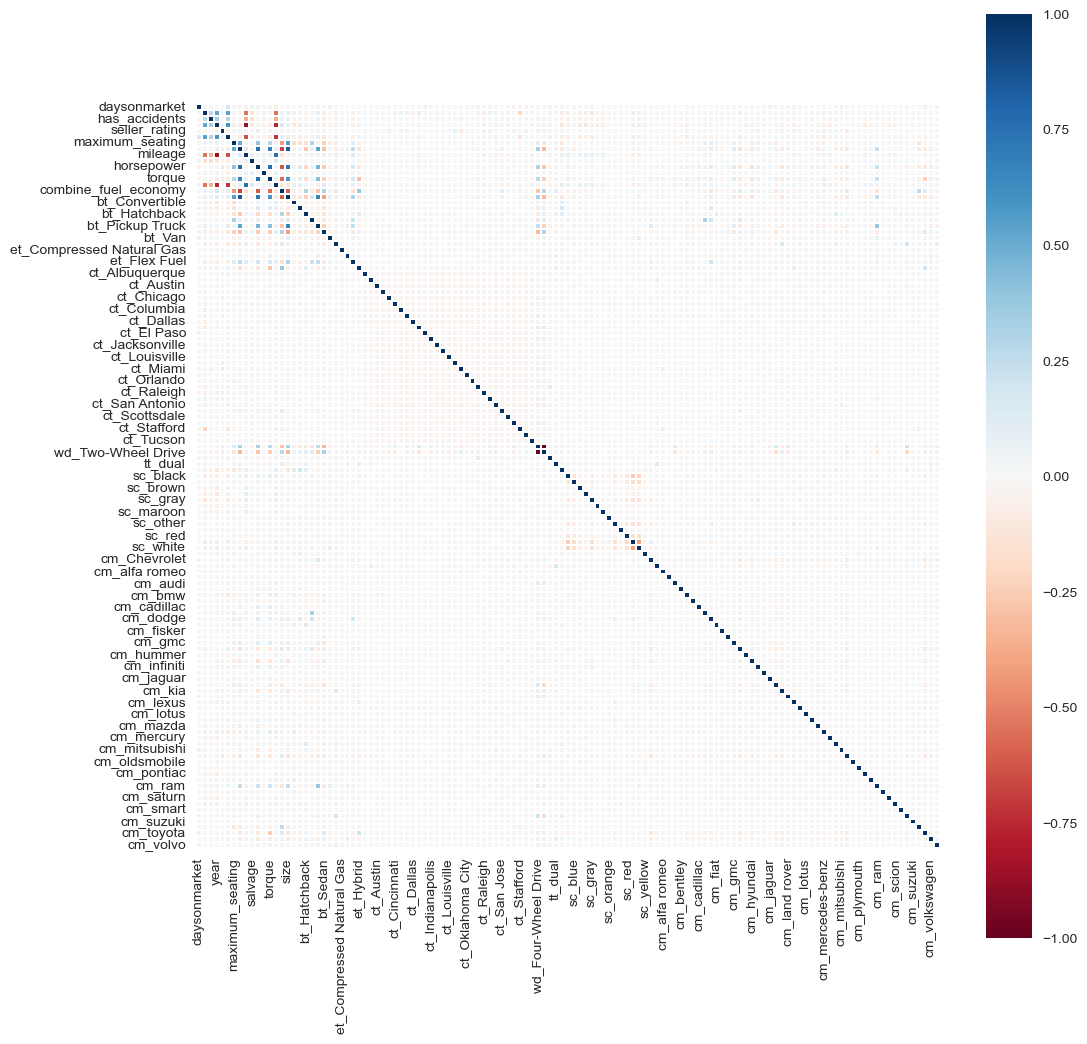

In [44]:
# We made a Heat Matrix for model 1
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0,vmin=-1.0, square=True, cmap=colormap, linecolor='white', annot=False)

In [45]:
# created a vif for model 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
pd.set_option('display.max_rows',200)
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

/Users/nathanaeljohnson/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/nathanaeljohnson/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
63,inf,sc_black
70,inf,sc_orange
72,inf,sc_purple
73,inf,sc_red
74,inf,sc_silver
75,inf,sc_white
76,inf,sc_yellow
69,inf,sc_maroon
68,inf,sc_green
67,inf,sc_gray


/var/folders/lf/954gm42n0ggfwzwkw46428280000gn/T/ipykernel_36578/2090022254.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 2000x800 with 0 Axes>

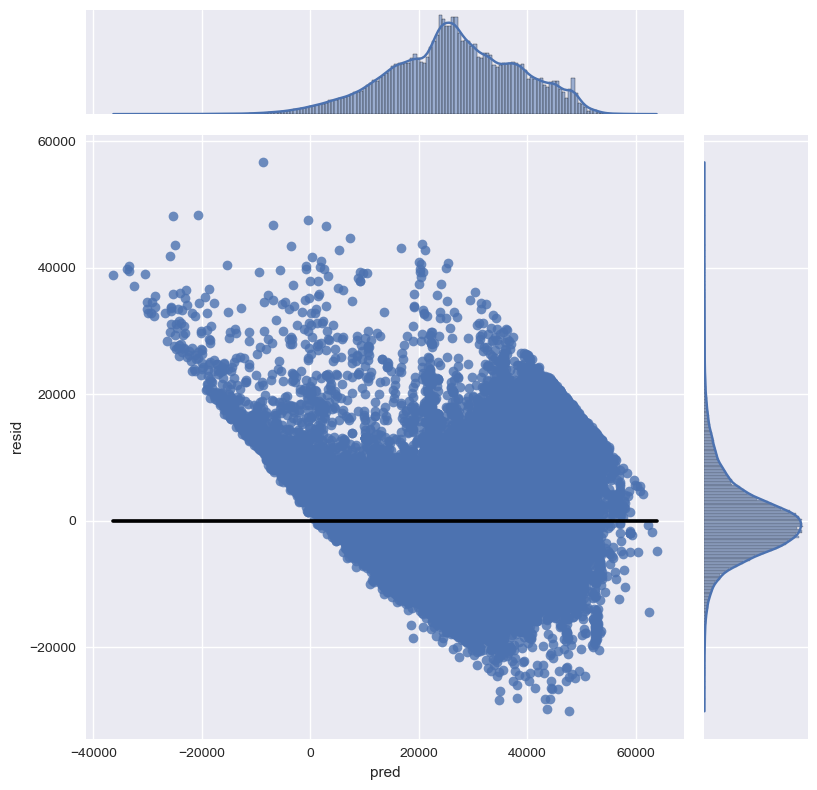

In [46]:
# concat pred and resid and renaming them properly
df_Fcarsales = pd.concat([df_Fcarsales,pred,resid],axis=1)
df_Fcarsales = df_Fcarsales.rename(columns = {0:'pred', 1:'resid'})
#join plot using pred and redis
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.jointplot(x='pred', y='resid', kind = "reg", data = df_Fcarsales, ratio = 5, height = 8,
line_kws={'color': 'black'})

### Model 2

In [47]:
df_Fcarsales = df_Fcarsales.drop(['sc_black'],axis =1)

In [48]:
#execute a mutiple regression using statsmodels for model 2
X  = df_Fcarsales[['daysonmarket', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'fuel_tank_volume', 'mileage', 'salvage', 'horsepower', 'theft_title', 'torque', 'owner_count', 'combine_fuel_economy', 'size', 'bt_Convertible', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Columbia', 'ct_Columbus', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Las Vegas', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'wd_Four-Wheel Drive', 'wd_Two-Wheel Drive', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_blue', 'sc_brown', 'sc_gold', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_purple', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin', 'cm_audi', 'cm_bentley', 'cm_bmw', 'cm_buick', 'cm_cadillac', 'cm_chrysler', 'cm_dodge', 'cm_fiat', 'cm_fisker', 'cm_genesis', 'cm_gmc', 'cm_honda', 'cm_hummer', 'cm_hyundai', 'cm_infiniti', 'cm_isuzu', 'cm_jaguar', 'cm_jeep', 'cm_kia', 'cm_land rover', 'cm_lexus', 'cm_lincoln', 'cm_lotus', 'cm_maserati', 'cm_mazda', 'cm_mercedes-benz', 'cm_mercury', 'cm_mini', 'cm_mitsubishi', 'cm_nissan', 'cm_oldsmobile', 'cm_plymouth', 'cm_pontiac', 'cm_porsche', 'cm_ram', 'cm_saab', 'cm_saturn', 'cm_scion', 'cm_smart', 'cm_subaru', 'cm_suzuki', 'cm_tesla', 'cm_toyota', 'cm_volkswagen', 'cm_volvo']]
Y = df_Fcarsales['price']

X = sm.add_constant(X) 
reg = sm.OLS(Y, X).fit()
pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     5724.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:29:38   Log-Likelihood:            -1.7061e+06
No. Observations:              169218   AIC:                         3.413e+06
Df Residuals:                  169093   BIC:                         3.414e+06
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.351e+06   1.79e+04    -75.599      0.000   -1.39e+06   -1.32e+06
daysonmarket                  0.9118      0.142      6.436      0.000       0.634       1.189
franchise_dealer           1436.7873     43.211     33.251      0.000    1352.095    1521.480
has_accidents               555.4394     53.857     10.313      0.000     449.880     660.998
year                        672.8336      8.857     75.965      0.000     655.474     690.193
seller_rating               425.9614     21.623     19.699      0.000     383.581     468.342
is_new                     4043.0114     45.337     89.177      0.000    3954.152    4131.871
maximum_seating            -164.6696     20.931     -7.867      0.000    -205.695    -123.644
fuel_tank_volume            280.3884      8.318     33.707      0.000     264.085     296.692
mileage                      -0.0816      0.001   -115.055      0.000      -0.083      -0.080
salvage                   -1551.6836    177.692     -8.732      0.000   -1899.955   -1203.412
horsepower                   67.8572      0.381    178.229      0.000      67.111      68.603
theft_title                  61.2097    280.253      0.218      0.827    -488.080     610.499
torque                        2.7516      0.208     13.198      0.000       2.343       3.160
owner_count                -482.2841     25.241    -19.107      0.000    -531.756    -432.812
combine_fuel_economy        122.6139      1.993     61.519      0.000     118.707     126.520
size                          0.0038      0.000     17.706      0.000       0.003       0.004
bt_Convertible             2131.1060    164.373     12.965      0.000    1808.939    2453.273
bt_Coupe                  -1003.9231    108.918     -9.217      0.000   -1217.399    -790.447
bt_Hatchback               -539.7540     94.650     -5.703      0.000    -725.267    -354.241
bt_Minivan                 -134.1029    102.828     -1.304      0.192    -335.643      67.437
bt_Pickup Truck            -594.7299     90.931     -6.540      0.000    -772.953    -416.507
bt_Sedan                  -2245.9256     42.538    -52.798      0.000   -2329.300   -2162.551
bt_Van                     -265.7335    189.370     -1.403      0.161    -636.895     105.428
bt_Wagon                   1111.1903    128.309      8.660      0.000     859.707    1362.674
et_Compressed Natural Gas  7397.5559   3344.662      2.212      0.027     842.092     1.4e+04
et_Diesel                  5954.4686    187.226     31.804      0.000    5587.510    6321.427
et_Flex Fuel              -3282.4007     78.753    -41.680      0.000   -3436.754   -3128.047
et_Hybrid                   122.6337    104.260      1.176      0.240     -81.713     326.980
ct_Albuquerque              126.3951    101.834      1.241      0.215     -

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
pd.set_option('display.max_rows',200)
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,1611723.4,const
58,45.6,wd_Four-Wheel Drive
59,45.3,wd_Two-Wheel Drive
16,16.2,size
8,7.4,fuel_tank_volume
11,5.4,horsepower
4,5.2,year
9,5.0,mileage
21,4.1,bt_Pickup Truck
14,3.5,owner_count


### Model 3

In [50]:
df_Fcarsales = df_Fcarsales.drop(['wd_Four-Wheel Drive','wd_Two-Wheel Drive'],axis =1)

In [51]:
#execute a mutiple regression using statsmodels for model 3
X  = df_Fcarsales[['daysonmarket', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'fuel_tank_volume', 'mileage', 'salvage', 'horsepower', 'theft_title', 'torque', 'owner_count', 'combine_fuel_economy', 'size', 'bt_Convertible', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Columbia', 'ct_Columbus', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Las Vegas', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_blue', 'sc_brown', 'sc_gold', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_purple', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin', 'cm_audi', 'cm_bentley', 'cm_bmw', 'cm_buick', 'cm_cadillac', 'cm_chrysler', 'cm_dodge', 'cm_fiat', 'cm_fisker', 'cm_genesis', 'cm_gmc', 'cm_honda', 'cm_hummer', 'cm_hyundai', 'cm_infiniti', 'cm_isuzu', 'cm_jaguar', 'cm_jeep', 'cm_kia', 'cm_land rover', 'cm_lexus', 'cm_lincoln', 'cm_lotus', 'cm_maserati', 'cm_mazda', 'cm_mercedes-benz', 'cm_mercury', 'cm_mini', 'cm_mitsubishi', 'cm_nissan', 'cm_oldsmobile', 'cm_plymouth', 'cm_pontiac', 'cm_porsche', 'cm_ram', 'cm_saab', 'cm_saturn', 'cm_scion', 'cm_smart', 'cm_subaru', 'cm_suzuki', 'cm_tesla', 'cm_toyota', 'cm_volkswagen', 'cm_volvo']]
Y = df_Fcarsales['price']

X = sm.add_constant(X) 
reg = sm.OLS(Y, X).fit()
pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     5344.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:33:11   Log-Likelihood:            -1.7119e+06
No. Observations:              169218   AIC:                         3.424e+06
Df Residuals:                  169095   BIC:                         3.425e+06
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.444e+06   1.85e+04    -78.212      0.000   -1.48e+06   -1.41e+06
daysonmarket                  0.7754      0.147      5.292      0.000       0.488       1.063
franchise_dealer           1356.5711     44.691     30.354      0.000    1268.977    1444.165
has_accidents               598.4066     55.720     10.740      0.000     489.197     707.617
year                        713.1003      9.156     77.885      0.000     695.155     731.045
seller_rating               455.7611     22.369     20.374      0.000     411.918     499.604
is_new                     4024.2406     46.861     85.876      0.000    3932.394    4116.087
maximum_seating            -263.7040     21.634    -12.189      0.000    -306.107    -221.301
fuel_tank_volume            394.0061      8.463     46.556      0.000     377.419     410.593
mileage                      -0.0822      0.001   -112.040      0.000      -0.084      -0.081
salvage                   -1457.2611    183.840     -7.927      0.000   -1817.584   -1096.939
horsepower                   65.2747      0.375    174.059      0.000      64.540      66.010
theft_title                  25.5523    289.952      0.088      0.930    -542.748     593.852
torque                        1.4765      0.215      6.860      0.000       1.055       1.898
owner_count                -458.8173     26.113    -17.570      0.000    -509.998    -407.636
combine_fuel_economy        102.8588      2.054     50.088      0.000      98.834     106.884
size                          0.0039      0.000     17.672      0.000       0.003       0.004
bt_Convertible              897.5213    168.653      5.322      0.000     566.966    1228.077
bt_Coupe                  -1894.6572    110.699    -17.115      0.000   -2111.626   -1677.689
bt_Hatchback              -1140.4212     97.480    -11.699      0.000   -1331.481    -949.362
bt_Minivan                -1424.0968    105.398    -13.512      0.000   -1630.674   -1217.520
bt_Pickup Truck            -145.2231     93.781     -1.549      0.121    -329.032      38.586
bt_Sedan                  -3259.7370     42.423    -76.839      0.000   -3342.886   -3176.588
bt_Van                    -2185.3830    195.059    -11.204      0.000   -2567.694   -1803.072
bt_Wagon                    737.8427    132.626      5.563      0.000     477.898     997.787
et_Compressed Natural Gas  8072.5084   3460.421      2.333      0.020    1290.160    1.49e+04
et_Diesel                  6527.4223    193.245     33.778      0.000    6148.666    6906.179
et_Flex Fuel              -3594.6251     81.424    -44.147      0.000   -3754.214   -3435.036
et_Hybrid                   707.7573    107.705      6.571      0.000     496.658     918.856
ct_Albuquerque              911.7444    104.944      8.688      0.000     7

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
pd.set_option('display.max_rows',200)
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,1607859.8,const
16,16.1,size
8,7.2,fuel_tank_volume
4,5.2,year
9,5.0,mileage
11,4.9,horsepower
21,4.1,bt_Pickup Truck
14,3.5,owner_count
13,3.1,torque
15,3.1,combine_fuel_economy


### Model 4

In [53]:
df_Fcarsales = df_Fcarsales.drop(['size','fuel_tank_volume'],axis =1)

In [54]:
#execute a mutiple regression using statsmodels for model 4
X  = df_Fcarsales[['daysonmarket', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'mileage', 'salvage', 'horsepower', 'theft_title', 'torque', 'owner_count', 'combine_fuel_economy', 'bt_Convertible', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Columbia', 'ct_Columbus', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Las Vegas', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_blue', 'sc_brown', 'sc_gold', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_purple', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin', 'cm_audi', 'cm_bentley', 'cm_bmw', 'cm_buick', 'cm_cadillac', 'cm_chrysler', 'cm_dodge', 'cm_fiat', 'cm_fisker', 'cm_genesis', 'cm_gmc', 'cm_honda', 'cm_hummer', 'cm_hyundai', 'cm_infiniti', 'cm_isuzu', 'cm_jaguar', 'cm_jeep', 'cm_kia', 'cm_land rover', 'cm_lexus', 'cm_lincoln', 'cm_lotus', 'cm_maserati', 'cm_mazda', 'cm_mercedes-benz', 'cm_mercury', 'cm_mini', 'cm_mitsubishi', 'cm_nissan', 'cm_oldsmobile', 'cm_plymouth', 'cm_pontiac', 'cm_porsche', 'cm_ram', 'cm_saab', 'cm_saturn', 'cm_scion', 'cm_smart', 'cm_subaru', 'cm_suzuki', 'cm_tesla', 'cm_toyota', 'cm_volkswagen', 'cm_volvo']]
Y = df_Fcarsales['price']

X = sm.add_constant(X) 
reg = sm.OLS(Y, X).fit()
pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     5224.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:37:02   Log-Likelihood:            -1.7145e+06
No. Observations:              169218   AIC:                         3.429e+06
Df Residuals:                  169097   BIC:                         3.430e+06
Df Model:                         120                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.458e+06   1.86e+04    -78.547      0.000   -1.49e+06   -1.42e+06
daysonmarket                  0.7440      0.149      5.000      0.000       0.452       1.036
franchise_dealer           1358.1698     45.381     29.928      0.000    1269.224    1447.115
has_accidents               592.5111     56.588     10.471      0.000     481.600     703.422
year                        722.5049      9.196     78.565      0.000     704.480     740.529
seller_rating               474.2200     22.716     20.876      0.000     429.698     518.742
is_new                     4040.3812     47.588     84.903      0.000    3947.110    4133.653
maximum_seating             374.9743     17.983     20.852      0.000     339.728     410.220
mileage                      -0.0781      0.001   -105.141      0.000      -0.080      -0.077
salvage                   -1554.4427    186.699     -8.326      0.000   -1920.368   -1188.517
horsepower                   75.9212      0.349    217.704      0.000      75.238      76.605
theft_title                 -80.0304    294.467     -0.272      0.786    -657.179     497.118
torque                        3.3538      0.217     15.464      0.000       2.929       3.779
owner_count                -486.2767     26.517    -18.338      0.000    -538.249    -434.304
combine_fuel_economy         70.7820      2.036     34.771      0.000      66.792      74.772
bt_Convertible               48.8381    169.460      0.288      0.773    -283.299     380.975
bt_Coupe                  -3091.7193    109.171    -28.320      0.000   -3305.691   -2877.747
bt_Hatchback              -2236.5042     96.389    -23.203      0.000   -2425.425   -2047.583
bt_Minivan                -1473.2827    103.822    -14.191      0.000   -1676.771   -1269.795
bt_Pickup Truck            2593.0275     68.213     38.014      0.000    2459.332    2726.723
bt_Sedan                  -3565.4641     40.391    -88.275      0.000   -3644.629   -3486.300
bt_Van                      460.2036    185.764      2.477      0.013      96.111     824.296
bt_Wagon                    340.3447    134.479      2.531      0.011      76.769     603.921
et_Compressed Natural Gas  5284.9257   3513.544      1.504      0.133   -1601.543    1.22e+04
et_Diesel                  7683.2812    195.565     39.288      0.000    7299.979    8066.584
et_Flex Fuel              -3002.3972     82.098    -36.571      0.000   -3163.307   -2841.487
et_Hybrid                  1120.8890    108.813     10.301      0.000     907.618    1334.161
ct_Albuquerque              836.9140    106.572      7.853      0.000     628.035    1045.793
ct_Arlington               -472.8132    112.637     -4.198      0.000    -693.580    -252.046
ct_Austin                  -168.8825     93.624     -1.804      0.071    -3

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
pd.set_option('display.max_rows',200)
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,1574272.5,const
4,5.1,year
8,5.0,mileage
10,4.1,horsepower
13,3.5,owner_count
12,3.1,torque
14,3.0,combine_fuel_economy
6,2.6,is_new
69,2.5,sc_silver
70,2.4,sc_white


### Model 5

In [56]:
df_Fcarsales = df_Fcarsales.drop(['theft_title','bt_Convertible','sc_purple','cm_isuzu','sc_gold','ct_Las Vegas','ct_Columbia','ct_Columbus'],axis =1)

In [57]:
# print out each column in the data frame 
print(df_Fcarsales.columns.tolist())
#This will list out all of the columns in the x 

['daysonmarket', 'price', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'mileage', 'salvage', 'horsepower', 'torque', 'owner_count', 'combine_fuel_economy', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_blue', 'sc_brown', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin'

In [58]:
#execute a mutiple regression using statsmodels for model 5
X  = df_Fcarsales[['daysonmarket', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'mileage', 'salvage', 'horsepower', 'torque', 'owner_count', 'combine_fuel_economy', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_blue', 'sc_brown', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin', 'cm_audi', 'cm_bentley', 'cm_bmw', 'cm_buick', 'cm_cadillac', 'cm_chrysler', 'cm_dodge', 'cm_fiat', 'cm_fisker', 'cm_genesis', 'cm_gmc', 'cm_honda', 'cm_hummer', 'cm_hyundai', 'cm_infiniti', 'cm_jaguar', 'cm_jeep', 'cm_kia', 'cm_land rover', 'cm_lexus', 'cm_lincoln', 'cm_lotus', 'cm_maserati', 'cm_mazda', 'cm_mercedes-benz', 'cm_mercury', 'cm_mini', 'cm_mitsubishi', 'cm_nissan', 'cm_oldsmobile', 'cm_plymouth', 'cm_pontiac', 'cm_porsche', 'cm_ram', 'cm_saab', 'cm_saturn', 'cm_scion', 'cm_smart', 'cm_subaru', 'cm_suzuki', 'cm_tesla', 'cm_toyota', 'cm_volkswagen', 'cm_volvo']]
Y = df_Fcarsales['price']

X = sm.add_constant(X) 
reg = sm.OLS(Y, X).fit()
pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     5598.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:41:30   Log-Likelihood:            -1.7145e+06
No. Observations:              169218   AIC:                         3.429e+06
Df Residuals:                  169105   BIC:                         3.430e+06
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.457e+06   1.84e+04    -79.226      0.000   -1.49e+06   -1.42e+06
daysonmarket                  0.7423      0.149      4.990      0.000       0.451       1.034
franchise_dealer           1357.8711     45.220     30.028      0.000    1269.240    1446.502
has_accidents               592.4290     56.576     10.471      0.000     481.541     703.317
year                        722.0920      9.114     79.228      0.000     704.229     739.955
seller_rating               474.4284     22.624     20.970      0.000     430.086     518.771
is_new                     4040.5516     47.565     84.949      0.000    3947.326    4133.777
maximum_seating             373.6153     17.368     21.512      0.000     339.575     407.655
mileage                      -0.0781      0.001   -105.740      0.000      -0.080      -0.077
salvage                   -1557.7660    186.345     -8.360      0.000   -1922.999   -1192.533
horsepower                   75.9315      0.346    219.196      0.000      75.253      76.610
torque                        3.3549      0.217     15.479      0.000       2.930       3.780
owner_count                -486.1447     26.487    -18.354      0.000    -538.058    -434.231
combine_fuel_economy         70.7663      2.035     34.773      0.000      66.778      74.755
bt_Coupe                  -3097.7088    107.473    -28.823      0.000   -3308.354   -2887.064
bt_Hatchback              -2238.8297     96.047    -23.310      0.000   -2427.079   -2050.580
bt_Minivan                -1472.1743    103.775    -14.186      0.000   -1675.572   -1268.777
bt_Pickup Truck            2589.7533     67.434     38.404      0.000    2457.584    2721.923
bt_Sedan                  -3567.4702     39.908    -89.393      0.000   -3645.689   -3489.252
bt_Van                      457.7938    185.596      2.467      0.014      94.029     821.559
bt_Wagon                    338.2874    134.308      2.519      0.012      75.046     601.529
et_Compressed Natural Gas  5283.5612   3513.388      1.504      0.133   -1602.602    1.22e+04
et_Diesel                  7683.0858    195.554     39.289      0.000    7299.805    8066.367
et_Flex Fuel              -3002.7601     82.093    -36.578      0.000   -3163.660   -2841.860
et_Hybrid                  1121.6739    108.776     10.312      0.000     908.474    1334.873
ct_Albuquerque              835.6608    101.370      8.244      0.000     636.978    1034.344
ct_Arlington               -474.3054    107.731     -4.403      0.000    -685.455    -263.156
ct_Austin                  -170.3313     87.527     -1.946      0.052    -341.882       1.220
ct_Charlotte                363.2699     96.722      3.756      0.000     173.697     552.843
ct_Chicago                  -71.8419    103.342     -0.695      0.487    -2

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
pd.set_option('display.max_rows',200)
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,1545684.5,const
4,5.0,year
8,4.9,mileage
10,4.1,horsepower
12,3.5,owner_count
11,3.1,torque
13,3.0,combine_fuel_economy
6,2.6,is_new
63,2.4,sc_white
62,2.4,sc_silver


## Final Model

In [60]:
#execute a mutiple regression using statsmodels for the Final Model
X  = df_Fcarsales[['daysonmarket', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'mileage', 'salvage', 'horsepower', 'torque', 'owner_count', 'combine_fuel_economy', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_blue', 'sc_brown', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin', 'cm_audi', 'cm_bentley', 'cm_bmw', 'cm_buick', 'cm_cadillac', 'cm_chrysler', 'cm_dodge', 'cm_fiat', 'cm_fisker', 'cm_genesis', 'cm_gmc', 'cm_honda', 'cm_hummer', 'cm_hyundai', 'cm_infiniti', 'cm_jaguar', 'cm_jeep', 'cm_kia', 'cm_land rover', 'cm_lexus', 'cm_lincoln', 'cm_lotus', 'cm_maserati', 'cm_mazda', 'cm_mercedes-benz', 'cm_mercury', 'cm_mini', 'cm_mitsubishi', 'cm_nissan', 'cm_oldsmobile', 'cm_plymouth', 'cm_pontiac', 'cm_porsche', 'cm_ram', 'cm_saab', 'cm_saturn', 'cm_scion', 'cm_smart', 'cm_subaru', 'cm_suzuki', 'cm_tesla', 'cm_toyota', 'cm_volkswagen', 'cm_volvo']]
Y = df_Fcarsales['price']

X = sm.add_constant(X) 
reg = sm.OLS(Y, X).fit()
pred = reg.predict(X) 
resid = reg.resid
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     5598.
Date:                Tue, 19 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:45:26   Log-Likelihood:            -1.7145e+06
No. Observations:              169218   AIC:                         3.429e+06
Df Residuals:                  169105   BIC:                         3.430e+06
Df Model:                         112                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -1.457e+06   1.84e+04    -79.226      0.000   -1.49e+06   -1.42e+06
daysonmarket                  0.7423      0.149      4.990      0.000       0.451       1.034
franchise_dealer           1357.8711     45.220     30.028      0.000    1269.240    1446.502
has_accidents               592.4290     56.576     10.471      0.000     481.541     703.317
year                        722.0920      9.114     79.228      0.000     704.229     739.955
seller_rating               474.4284     22.624     20.970      0.000     430.086     518.771
is_new                     4040.5516     47.565     84.949      0.000    3947.326    4133.777
maximum_seating             373.6153     17.368     21.512      0.000     339.575     407.655
mileage                      -0.0781      0.001   -105.740      0.000      -0.080      -0.077
salvage                   -1557.7660    186.345     -8.360      0.000   -1922.999   -1192.533
horsepower                   75.9315      0.346    219.196      0.000      75.253      76.610
torque                        3.3549      0.217     15.479      0.000       2.930       3.780
owner_count                -486.1447     26.487    -18.354      0.000    -538.058    -434.231
combine_fuel_economy         70.7663      2.035     34.773      0.000      66.778      74.755
bt_Coupe                  -3097.7088    107.473    -28.823      0.000   -3308.354   -2887.064
bt_Hatchback              -2238.8297     96.047    -23.310      0.000   -2427.079   -2050.580
bt_Minivan                -1472.1743    103.775    -14.186      0.000   -1675.572   -1268.777
bt_Pickup Truck            2589.7533     67.434     38.404      0.000    2457.584    2721.923
bt_Sedan                  -3567.4702     39.908    -89.393      0.000   -3645.689   -3489.252
bt_Van                      457.7938    185.596      2.467      0.014      94.029     821.559
bt_Wagon                    338.2874    134.308      2.519      0.012      75.046     601.529
et_Compressed Natural Gas  5283.5612   3513.388      1.504      0.133   -1602.602    1.22e+04
et_Diesel                  7683.0858    195.554     39.289      0.000    7299.805    8066.367
et_Flex Fuel              -3002.7601     82.093    -36.578      0.000   -3163.660   -2841.860
et_Hybrid                  1121.6739    108.776     10.312      0.000     908.474    1334.873
ct_Albuquerque              835.6608    101.370      8.244      0.000     636.978    1034.344
ct_Arlington               -474.3054    107.731     -4.403      0.000    -685.455    -263.156
ct_Austin                  -170.3313     87.527     -1.946      0.052    -341.882       1.220
ct_Charlotte                363.2699     96.722      3.756      0.000     173.697     552.843
ct_Chicago                  -71.8419    103.342     -0.695      0.487    -2

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
pd.set_option('display.max_rows',200)
round(vif, 1).sort_values(by = 'VIF Factor', ascending = False)

,VIF Factor,features
0,1545684.5,const
4,5.0,year
8,4.9,mileage
10,4.1,horsepower
12,3.5,owner_count
11,3.1,torque
13,3.0,combine_fuel_economy
6,2.6,is_new
63,2.4,sc_white
62,2.4,sc_silver


In [62]:
# We made a Correlation Matrix for the Final Model
features = df_Fcarsales[['daysonmarket', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'mileage', 'salvage', 'horsepower', 'torque', 'owner_count', 'combine_fuel_economy', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_blue', 'sc_brown', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin', 'cm_audi', 'cm_bentley', 'cm_bmw', 'cm_buick', 'cm_cadillac', 'cm_chrysler', 'cm_dodge', 'cm_fiat', 'cm_fisker', 'cm_genesis', 'cm_gmc', 'cm_honda', 'cm_hummer', 'cm_hyundai', 'cm_infiniti', 'cm_jaguar', 'cm_jeep', 'cm_kia', 'cm_land rover', 'cm_lexus', 'cm_lincoln', 'cm_lotus', 'cm_maserati', 'cm_mazda', 'cm_mercedes-benz', 'cm_mercury', 'cm_mini', 'cm_mitsubishi', 'cm_nissan', 'cm_oldsmobile', 'cm_plymouth', 'cm_pontiac', 'cm_porsche', 'cm_ram', 'cm_saab', 'cm_saturn', 'cm_scion', 'cm_smart', 'cm_subaru', 'cm_suzuki', 'cm_tesla', 'cm_toyota', 'cm_volkswagen', 'cm_volvo']]
#shows all columns and rows
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
corrMatrix = features.corr()
df_corrMatrix = pd.DataFrame(corrMatrix)
df_corrMatrix

,daysonmarket,franchise_dealer,has_accidents,year,seller_rating,is_new,maximum_seating,mileage,salvage,horsepower,torque,owner_count,combine_fuel_economy,bt_Coupe,bt_Hatchback,bt_Minivan,bt_Pickup Truck,bt_Sedan,bt_Van,bt_Wagon,et_Compressed Natural Gas,et_Diesel,et_Flex Fuel,et_Hybrid,ct_Albuquerque,ct_Arlington,ct_Austin,ct_Charlotte,ct_Chicago,ct_Cincinnati,ct_Dallas,ct_Denver,ct_El Paso,ct_Indianapolis,ct_Jacksonville,ct_Louisville,ct_Madison,ct_Miami,ct_Oklahoma City,ct_Orlando,ct_Phoenix,ct_Raleigh,ct_Richmond,ct_San Antonio,ct_San Jose,ct_Scottsdale,ct_Springfield,ct_Stafford,ct_Tampa,ct_Tucson,tt_Unknown,tt_dual,tt_manual,sc_blue,sc_brown,sc_gray,sc_green,sc_maroon,sc_orange,sc_other,sc_red,sc_silver,sc_white,sc_yellow,cm_Chevrolet,cm_acura,cm_alfa romeo,cm_aston martin,cm_audi,cm_bentley,cm_bmw,cm_buick,cm_cadillac,cm_chrysler,cm_dodge,cm_fiat,cm_fisker,cm_genesis,cm_gmc,cm_honda,cm_hummer,cm_hyundai,cm_infiniti,cm_jaguar,cm_jeep,cm_kia,cm_land rover,cm_lexus,cm_lincoln,cm_lotus,cm_maserati,cm_mazda,cm_mercedes-benz,cm_mercury,cm_mini,cm_mitsubishi,cm_nissan,cm_oldsmobile,cm_plymouth,cm_pontiac,cm_porsche,cm_ram,cm_saab,cm_saturn,cm_scion,cm_smart,cm_subaru,cm_suzuki,cm_tesla,cm_toyota,cm_volkswagen,cm_volvo
daysonmarket,1.000000,0.012554,-0.008252,-0.007708,-0.014692,0.175136,-0.016544,-0.044418,0.053502,-0.039468,-0.025437,-0.053970,2.997319e-03,-0.023886,0.012932,0.005554,-0.025049,-0.013339,0.052696,0.004689,0.000410,0.005108,0.001649,-0.007230,0.003205,0.005532,-6.843193e-03,-0.017739,0.013833,-0.006819,-0.008881,-4.421862e-03,0.055496,-0.007928,0.010055,0.015329,-0.002978,0.020228,0.025443,-0.013609,-0.019500,-0.017087,0.017115,0.009376,-0.007598,-0.013172,0.009091,-0.042091,-0.020231,-0.001333,-0.027559,1.548134e-02,-0.008330,-0.010810,0.011881,-0.015596,-0.003291,0.005040,-0.002946,-0.005528,0.006376,0.006215,0.003412,0.000180,-0.027321,0.016580,0.006673,-0.001096,-0.017120,0.002306,0.023859,0.021075,0.011320,0.007019,-0.012904,0.014049,-0.002635,-0.000399,-0.023951,-0.026160,0.001502,0.016901,0.003212,0.043294,0.014429,-0.011732,0.029016,-0.023561,0.018933,0.006641,0.007619,-0.002692,-0.001631,0.001714,0.016283,0.040413,0.010804,-0.001038,0.000504,0.008005,0.003728,-0.001143,-0.001149,0.003255,0.005058,-0.001874,-0.035597,0.003681,-0.009207,-0.064698,0.003387,0.037133
franchise_dealer,0.012554,1.000000,0.271135,0.529374,-0.014621,0.546060,0.033908,-0.546177,-0.132980,0.003571,-0.043079,-0.546083,6.699042e-02,-0.049714,-0.034984,-0.026201,0.066500,-0.084039,-0.022911,-0.055278,-0.003866,0.003065,-0.070882,0.027331,-0.003875,0.008620,1.785216e-02,-0.011580,-0.006705,0.055293,-0.050308,-1.073431e-01,0.019755,-0.000153,0.034449,0.007748,0.026421,-0.013825,0.032848,-0.030182,-0.048098,-0.075921,0.039623,0.057735,0.023908,0.028306,0.005408,-0.213920,0.017405,-0.017691,0.046718,1.683808e-02,-0.065511,0.000332,-0.074025,-0.136283,-0.041318,-0.051615,-0.007924,0.020409,0.017269,0.095292,0.057815,-0.013481,0.004669,0.016576,-0.009567,-0.009109,-0.030070,-0.014914,-0.049559,0.012506,-0.002119,-0.037652,-0.028573,-0.017347,-0.007723,-0.010042,-0.000748,0.057677,-0.019288,0.005498,-0.015578,-0.005874,0.016359,-0.011061,-0.016316,-0.012141,0.012840,-0.005468,-0.026944,0.030502,-0.061544,-0.033266,-0.009557,-0.016754,-0.024891,-0.004514,-0.005468,-0.031673,-0.015148,0.032673,-0.011624,-0.032373,-0.033722,-0.011435,0.008439,-0.016752,-0.035166,-0.002066,0.025912,0.005431
has_accidents,-0.008252,0.271135,1.000000,0.351537,0.004415,0.290744,0.026349,-0.362069,-0.174984,0.018058,-0.013027,-0.359743,4.879401e-02,-0.033358,-0.021044,-0.003275,0.037295,-0.067702,0.001197,-0.027781,-0.003525,0.002604,-0.033696,0.016763,0.010374,0.002290,1.617625e-02,0.000837,-0.009684,0.008773,-0.005981,-1.537143e-02,-0.005145,-0.016959,-0.019407,-0.010579,0.012158,-0.064186,0.005871,-0.034236,-0.000253,-0.026141,0.023303,0.020897,0.026987,0.032222,0.006006,0.022650,-0.001352,0.007588,0.018236,5.987619e-03,-0.029941,-0.002847,-0.040878,-0.042143,-0

<Axes: >

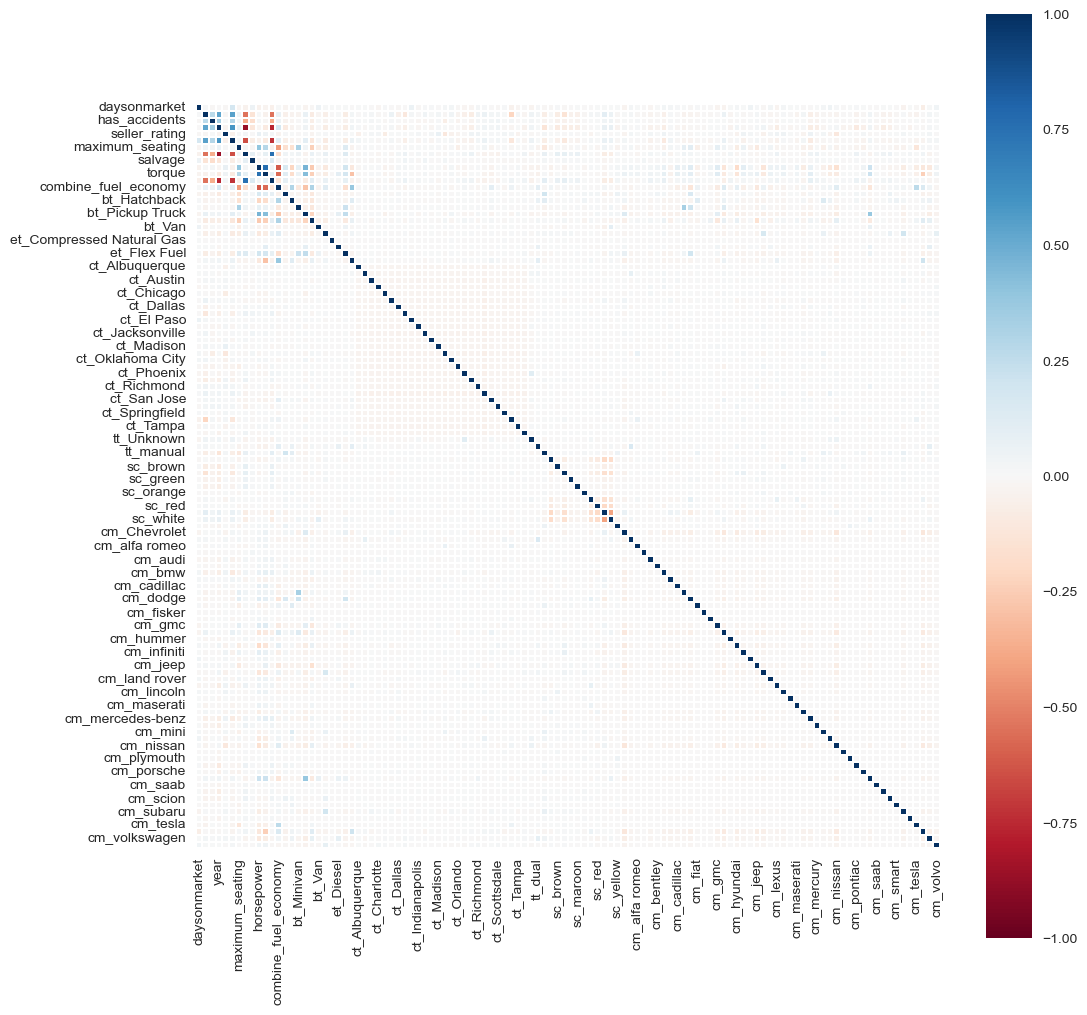

In [63]:
# We made a Heat Matrix for the Final Model
colormap = plt.cm.RdBu
plt.figure(figsize=(12,12))
sns.heatmap(df_corrMatrix,linewidths=0.1,vmax=1.0,vmin=-1.0, square=True, cmap=colormap, linecolor='white', annot=False)

/var/folders/lf/954gm42n0ggfwzwkw46428280000gn/T/ipykernel_36578/2192624508.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Figure size 2000x800 with 0 Axes>

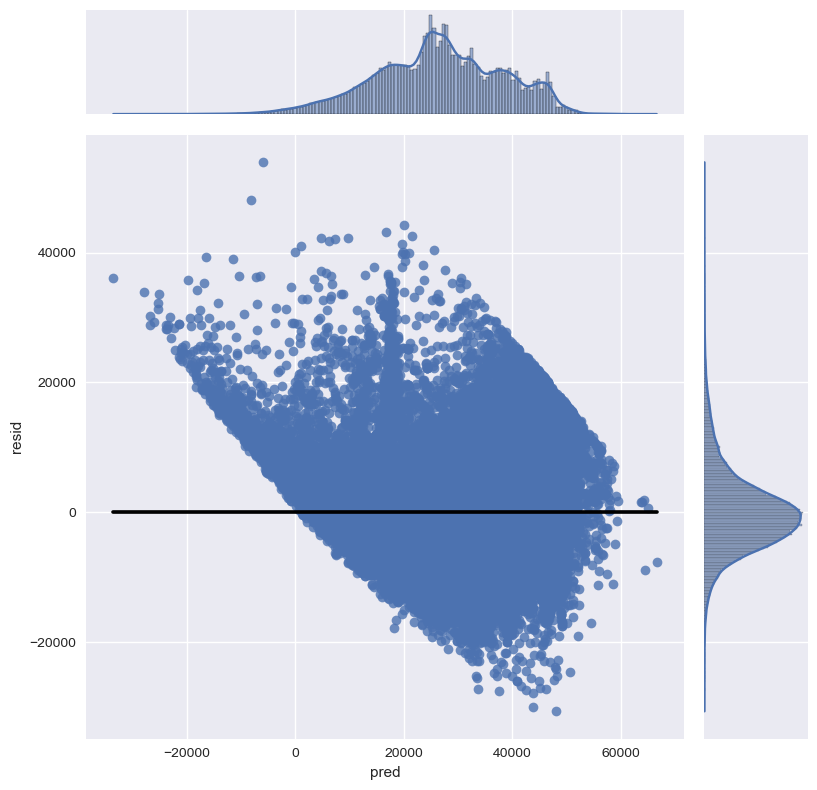

In [64]:
df_Fcarsales = df_Fcarsales[['daysonmarket', 'franchise_dealer', 'has_accidents', 'year', 'seller_rating', 'is_new', 'maximum_seating', 'mileage', 'salvage', 'horsepower', 'torque', 'owner_count', 'combine_fuel_economy', 'bt_Coupe', 'bt_Hatchback', 'bt_Minivan', 'bt_Pickup Truck', 'bt_Sedan', 'bt_Van', 'bt_Wagon', 'et_Compressed Natural Gas', 'et_Diesel', 'et_Flex Fuel', 'et_Hybrid', 'ct_Albuquerque', 'ct_Arlington', 'ct_Austin', 'ct_Charlotte', 'ct_Chicago', 'ct_Cincinnati', 'ct_Dallas', 'ct_Denver', 'ct_El Paso', 'ct_Indianapolis', 'ct_Jacksonville', 'ct_Louisville', 'ct_Madison', 'ct_Miami', 'ct_Oklahoma City', 'ct_Orlando', 'ct_Phoenix', 'ct_Raleigh', 'ct_Richmond', 'ct_San Antonio', 'ct_San Jose', 'ct_Scottsdale', 'ct_Springfield', 'ct_Stafford', 'ct_Tampa', 'ct_Tucson', 'tt_Unknown', 'tt_dual', 'tt_manual', 'sc_blue', 'sc_brown', 'sc_gray', 'sc_green', 'sc_maroon', 'sc_orange', 'sc_other', 'sc_red', 'sc_silver', 'sc_white', 'sc_yellow', 'cm_Chevrolet', 'cm_acura', 'cm_alfa romeo', 'cm_aston martin', 'cm_audi', 'cm_bentley', 'cm_bmw', 'cm_buick', 'cm_cadillac', 'cm_chrysler', 'cm_dodge', 'cm_fiat', 'cm_fisker', 'cm_genesis', 'cm_gmc', 'cm_honda', 'cm_hummer', 'cm_hyundai', 'cm_infiniti', 'cm_jaguar', 'cm_jeep', 'cm_kia', 'cm_land rover', 'cm_lexus', 'cm_lincoln', 'cm_lotus', 'cm_maserati', 'cm_mazda', 'cm_mercedes-benz', 'cm_mercury', 'cm_mini', 'cm_mitsubishi', 'cm_nissan', 'cm_oldsmobile', 'cm_plymouth', 'cm_pontiac', 'cm_porsche', 'cm_ram', 'cm_saab', 'cm_saturn', 'cm_scion', 'cm_smart', 'cm_subaru', 'cm_suzuki', 'cm_tesla', 'cm_toyota', 'cm_volkswagen', 'cm_volvo']]
# concat pred and resid and renaming them properly
df_Fcarsales = pd.concat([df_Fcarsales,pred,resid],axis=1)
df_Fcarsales = df_Fcarsales.rename(columns = {0:'pred', 1:'resid'})
#join plot using pred and redis
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
sns.jointplot(x='pred', y='resid', kind = "reg", data = df_Fcarsales, ratio = 5, height = 8,line_kws={'color': 'black'})

## Summary

***Summary of the Notebook and Results***

* ***R-Squared:(First Model vs. Final Model)***
    * First Model R-squared: 0.808
    * Final Model R-squared: 0.788
    * The R-squared is lowered because we removed multicollinearity and high p-values.
    * The R-squared value indicates the goodness of fit of the model. In this case, R² for the First Model is approximately 0.808, which suggests that the model explains approximately 80.8% of the variance in 'price', whereas the R² for the Final Model is approximately 0.788, which suggests that the model explains approximately 78.8%.
    * Comparing the two models, the second model has a slightly higher R-squared value, suggesting that it may provide a slightly better fit to the data in terms of explaining the variation in the price. However, it's important to consider the context and purpose of the regression analysis when choosing which model to use. Additionally, it's essential to assess the statistical significance of individual coefficients and potential multicollinearity issues before making any conclusions about the models' effectiveness in predicting prices.
    
    
    
* ***Methodology:***
    * Began with cleaning up the data and accounting for Null value in the data
    * Looked at data where it made sense to combine values (ex: combined fuel economy)
    * Corrected for outliers in price
    * Cared for areas where overlap existed (ex: car volume and size)
    * We engineered features that we use to combine values within the same variable.
    * Created combined features where it made sense to do so(ex: transmission type and engine type)
    * We one-hot encoded objects into integers.
    * We created dummy variables for variables with multiple values.
    * Removed variables with high multicollinearity
    * Removed variables with high p-values


* ***Findings:***

    * Some of the earliest challenges came from working with an unclean data set.  There were multiple data points that were mislabeled, or was missing data entirely.  After cleaning up the data, we began analyzing the regression model for better fit.  While, it is possible to get more creative with filling in missing data, there is also potential risk where calculated assumptions begin to skew the underlying data.  It was interesting to see how strongly correlated some features like horsepower and torque and mileage and number of owners were, along with some of the impacts on price.    

## Proven Hypothesis

#### ***Vehicle Age vs. Price:***

* Hypothesis: Older cars may have lower prices compared to newer ones.
* Prediction: You can predict that there is a negative correlation between 'year' (vehicle age) and 'price.' Newer cars tend to be more expensive.

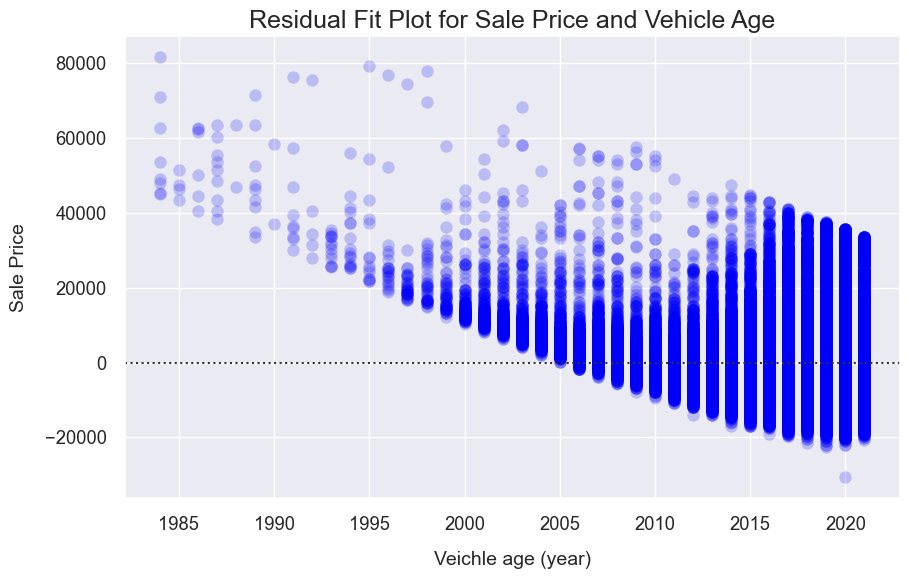

In [65]:
# Create a residual plot for Vehicle Age vs. Price
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.residplot(x='year', y=Y, data=df_Fcarsales, scatter_kws={"color": "blue", "alpha": 0.2, "s": 80}, line_kws={'color': 'black'})

# Set title, xlabel, and ylabel with specified font sizes and alignment
plt.title('Residual Fit Plot for Sale Price and Vehicle Age', fontsize=18, loc='center')
plt.xlabel('Veichle age (year)', fontsize=14, labelpad=12)
plt.ylabel('Sale Price', fontsize=14, labelpad=12)

# Show the plot
plt.show()

As you look at the chart you can see the residual values get higher as they are further away from the price.

#### ***Mileage vs. Price:***

* Hypothesis: Higher mileage in a car typically leads to a lower price since it indicates more wear and tear.
* Prediction: You can predict that there is a negative correlation between 'mileage' and 'price,' meaning that as mileage increases, the price tends to decrease. 

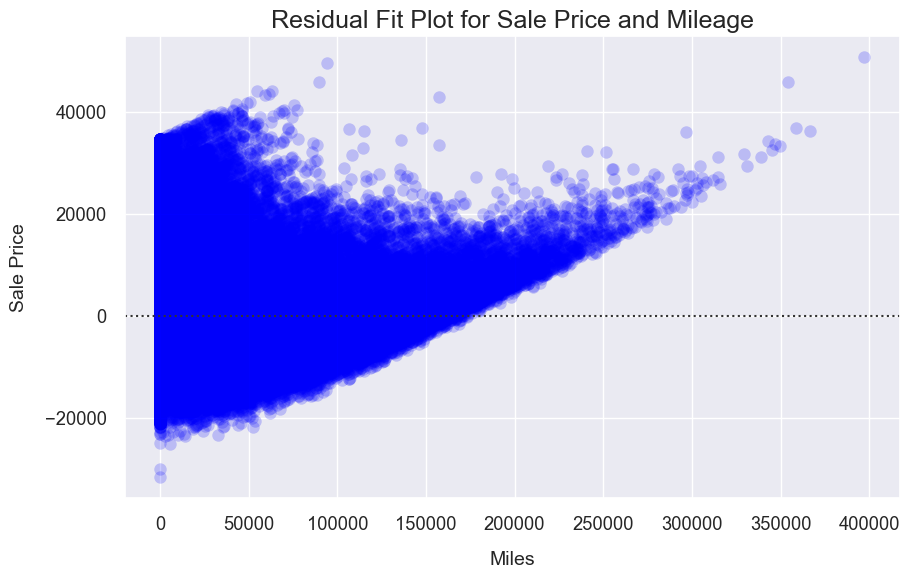

In [66]:
# Create a residual plot for Mileage vs. Price
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.residplot(x='mileage', y=Y, data=df_Fcarsales, scatter_kws={"color": "blue", "alpha": 0.2, "s": 80}, line_kws={'color': 'black'})

# Set title, xlabel, and ylabel with specified font sizes and alignment
plt.title('Residual Fit Plot for Sale Price and Mileage', fontsize=18, loc='center')
plt.xlabel('Miles', fontsize=14, labelpad=12)
plt.ylabel('Sale Price', fontsize=14, labelpad=12)

# Show the plot
plt.show()

As mileage increases variance of sale price decreases and population density also decreases.

#### ***Fuel Economy vs. Price:***

* Hypothesis: Cars with better fuel economy (higher city and highway fuel economy ratings) may have higher prices due to lower operating costs.
* Prediction: You can predict that there is a positive correlation between 'combine_fuel_economy'(city_fuel_economy' and 'highway_fuel_economy') with 'price.' Fuel-efficient cars may command higher prices.

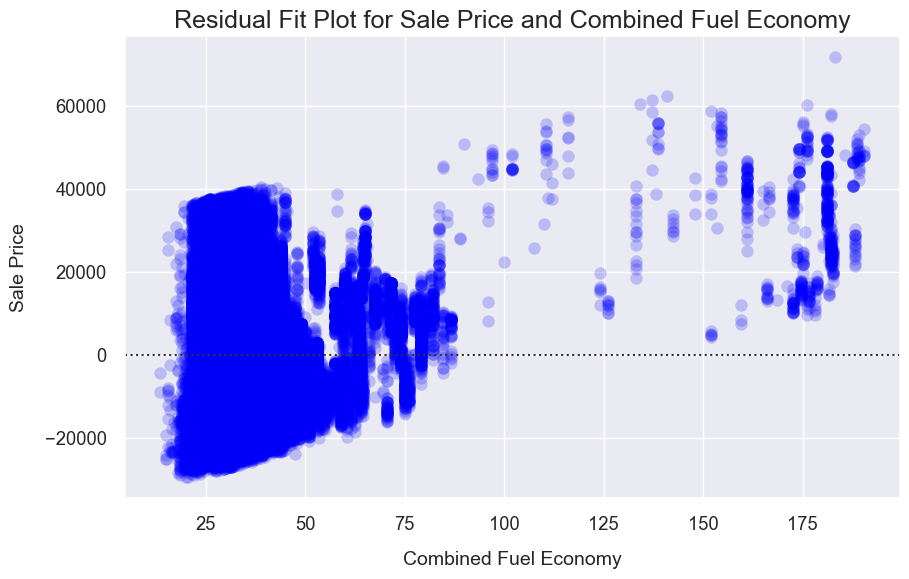

In [67]:
# Create a residual plot for Fuel Economy vs. Price
sns.set(style="darkgrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.residplot(x='combine_fuel_economy', y=Y, data=df_Fcarsales, scatter_kws={"color": "blue", "alpha": 0.2, "s": 80}, line_kws={'color': 'black'})

# Set title, xlabel, and ylabel with specified font sizes and alignment
plt.title('Residual Fit Plot for Sale Price and Combined Fuel Economy', fontsize=18, loc='center')
plt.xlabel('Combined Fuel Economy', fontsize=14, labelpad=12)
plt.ylabel('Sale Price', fontsize=14, labelpad=12)

# Show the plot
plt.show()

Combined fuel economy does show a higher than predicted sale price for vehicles that exceed 150 miles per gallon and the fact that the majority of our population in the dataset were not hybrid helps to explain why the plot is skewed to the left. 